<a href="https://colab.research.google.com/github/mikhayluv/bonus_track/blob/main/bonus_track_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Итоговый проект**
Работу выполнили:
*   Михайлов Давид Владимирович 
*   Пешкин Илья Егорович



## **Цель и постановка задачи**


**Цель:**
>   Выполнение разведочного анализа собранного датасета, полученного из парсеров, используя официальный сайт о муниципальных учреждениях России.

**Задачи:**
>   Создание парсера и сбор данных.

>   Предварительная обработка данных: очистка, удаление строк с аномальными значениями, изменение типов данных и прочее.

>   Анализ + Визуализация.

>   Выводы.

## **Импорт необходимых библиотек**

In [204]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

## **Этап проектирования, создания и корректировка датасета**


Начало нашего датасета берёт с момента создания двух парсеров, написанных на языке Python. Они собирали данные о муниципальных учреждениях России с официального сайта, содержащего информацию об этих учреждениях - [bus.gov.ru](https://bus.gov.ru/).

Наши парсеры находятся в репозитории - https://github.com/mikhayluv/bonus_track/tree/main/parsers.

Там находятся два файла: agency_api.py и main.py.

В файле main.py происходит сбор основной информации о учреждениях, перебирая все значения ИНН учреждений (данные ИНН были найдены в определенном XML-документе на сайте, нужно было просто пройтись по всему XML-документу и извлечь только номера ИНН, их оказалось около 150 тыс. штук).  
После перебора всех ИНН, мы получили файл со значениями: название учреждения, определенный номер agency (пригодится в дальнейшей программе) и наименование региона учреждения.

В файле agency_api.py уже посредством найденных значений agency из main.py записываем другую информацию об учреждениях, а именно: год, среднюю зарплату на сотрудника, сумма денежных поступлений за год, количество сотрудников и значение agency, при помощи которого мы потом соединим две полученные "базы данных" из этих двух парсеров.

Конечным результатом слияния двух файлов является датасет из более чем 1млн записей, полученных из наших парсеров.

### **Подготовка первой части датасета**

Для подготовки первой части датасета необходимо:

1.   Избавиться от строчек с аномальными значениями в столбце ***agency***
2.   Привести данные к нужному типу 
3.   Избавиться от строчек с аномальными значениями (NaN)



Копируем наши файлы с данными с github'a:

In [205]:
!git clone https://github.com/mikhayluv/bonus_track/

fatal: destination path 'bonus_track' already exists and is not an empty directory.


Создаем переменную, в которую считываем наш первый файл (у него расширение txt, но данные записаны в формате csv) и выводим результат:

In [206]:
df_from_full_info = pd.read_csv('/content/bonus_track/data/full_info.txt', encoding='utf-8', sep=';', on_bad_lines='skip')
df_from_full_info

,agency,inn,region,name
0,1146,7.520001e+09,Забайкальский край,МУНИЦИПАЛЬНОЕ БЮДЖЕТНОЕ ДОШКОЛЬНОЕ ОБРАЗОВАТЕЛ...
1,1116,1.709005e+09,Тыва Респ,МУНИЦИПАЛЬНОЕ БЮДЖЕТНОЕ ОБЩЕОБРАЗОВАТЕЛЬНОЕ УЧ...
2,1276,4.619003e+09,Курская обл,МУНИЦИПАЛЬНОЕ КАЗЕННОЕ ОБЩЕОБРАЗОВАТЕЛЬНОЕ УЧР...
3,3224,2.356043e+09,Краснодарский край,ГОСУДАРСТВЕННОЕ КАЗЕННОЕ УЧРЕЖДЕНИЕ КРАСНОДАРС...
4,28167,2.720031e+09,Хабаровский край,"МУНИЦИПАЛЬНОЕ КАЗЕННОЕ УЧРЕЖДЕНИЕ КУЛЬТУРЫ ""ЦЕ..."
...,...,...,...,...
133218,240467,2.543004e+09,Приморский край,МУНИЦИПАЛЬНОЕ БЮДЖЕТНОЕ ДОШКОЛЬНОЕ ОБРАЗОВАТЕЛ...
133219,93140,3.526015e+09,Вологодская обл,МУНИЦИПАЛЬНОЕ БЮДЖЕТНОЕ ОБЩЕОБРАЗОВАТЕЛЬНОЕ УЧ...
133220,62706,1.642010e+09,Татарстан Респ,МУНИЦИПАЛЬНОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ДОПОЛНИТЕЛЬ...
133221,151146,4.345058e+09,Кировская обл,МУНИЦИПАЛЬНОЕ КАЗЕННОЕ ДОШКОЛЬНОЕ ОБРАЗОВАТЕЛЬ...


Предварительно просмотрев весь файл, мы нашли неправильную запись в столбце agency. Скорее всего, записывая информацию об учреждениях непосредственно на самом сайте, кто-то использовал разделители ";", что и привело к нашей проблеме:

In [207]:
wrong_agency = df_from_full_info['agency'][~df_from_full_info['agency'].str.match('^\d')]
wrong_agency.head()

9893                   МИХАЙЛОВСКОГО МУНИЦИПАЛЬНОГО РАЙОНА
11717                             СПОРТИВНАЯ ШКОЛА "ОЛИМП"
14984    КРЫЛОВСКОЙ МУНИЦИПАЛЬНОГО ОБРАЗОВАНИЯ КРЫЛОВСК...
16797    \n33024;2540076463;Приморский край;МУНИЦИПАЛЬН...
21791                    АРХИВ ОЧЕРСКОГО ГОРОДСКОГО ОКРУГА
Name: agency, dtype: object

Удаляем все неправильные значения ***agency***:

In [208]:
df_from_full_info.drop(wrong_agency.index, inplace=True) 

Изменяем типы данных ***agency*** и ***inn***, что необходимо для дальнейшего слияния двух частей в одну:

In [209]:
df_from_full_info['agency'] = df_from_full_info['agency'].astype(np.int64)
df_from_full_info['inn'] = df_from_full_info['inn'].astype(np.int64)
df_from_full_info

,agency,inn,region,name
0,1146,7520000715,Забайкальский край,МУНИЦИПАЛЬНОЕ БЮДЖЕТНОЕ ДОШКОЛЬНОЕ ОБРАЗОВАТЕЛ...
1,1116,1709005160,Тыва Респ,МУНИЦИПАЛЬНОЕ БЮДЖЕТНОЕ ОБЩЕОБРАЗОВАТЕЛЬНОЕ УЧ...
2,1276,4619003318,Курская обл,МУНИЦИПАЛЬНОЕ КАЗЕННОЕ ОБЩЕОБРАЗОВАТЕЛЬНОЕ УЧР...
3,3224,2356043191,Краснодарский край,ГОСУДАРСТВЕННОЕ КАЗЕННОЕ УЧРЕЖДЕНИЕ КРАСНОДАРС...
4,28167,2720031380,Хабаровский край,"МУНИЦИПАЛЬНОЕ КАЗЕННОЕ УЧРЕЖДЕНИЕ КУЛЬТУРЫ ""ЦЕ..."
...,...,...,...,...
133218,240467,2543004347,Приморский край,МУНИЦИПАЛЬНОЕ БЮДЖЕТНОЕ ДОШКОЛЬНОЕ ОБРАЗОВАТЕЛ...
133219,93140,3526014989,Вологодская обл,МУНИЦИПАЛЬНОЕ БЮДЖЕТНОЕ ОБЩЕОБРАЗОВАТЕЛЬНОЕ УЧ...
133220,62706,1642010205,Татарстан Респ,МУНИЦИПАЛЬНОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ДОПОЛНИТЕЛЬ...
133221,151146,4345058150,Кировская обл,МУНИЦИПАЛЬНОЕ КАЗЕННОЕ ДОШКОЛЬНОЕ ОБРАЗОВАТЕЛЬ...


Также проверяем значения строк, в которых могут быть NaN:

In [210]:
non_values_1 = df_from_full_info[df_from_full_info.isnull().any(axis=1) | df_from_full_info.isin([np.inf, -np.inf]).any(axis=1)]
non_values_1

,agency,inn,region,name
20964,268287,6321236658,NaN,САМАРСКАЯ БОЛЬНИЦА ФИЛИАЛ № 1 ФЕДЕРАЛЬНОГО ГОС...
69036,93880,1501004752,NaN,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ ПРОФЕССИОНАЛЬНОЕ ОБР...
122605,233710,5321048476,NaN,МУНИЦИПАЛЬНОЕ АВТОНОМНОЕ ОБЩЕОБРАЗОВАТЕЛЬНОЕ ...
129706,215363,3123183374,NaN,МУНИЦИПАЛЬНОЕ БЮДЖЕТНОЕ ДОШКОЛЬНОЕ ОБРАЗОВАТЕЛ...


Удаляем все строки с NaN значениями:

In [211]:
df_from_full_info.drop(non_values_1.index, inplace=True)

### **Подготовка второй части датасета**

Первая часть данных готова, теперь подготовим вторую часть. Для этого необходимо:

1.   Переименовать столбцы
2.   Заменить запятые на точки
3.   Привести данные к нужному типу
4.   Избавиться от строчек с аномальными значениями (NaN)


Создаем переменную, в которую cчитываем наш второй файл (у него уже расширение csv), даем названия столбцам и выводим результат:

In [212]:
df_from_agency_api = pd.read_csv('/content/bonus_track/data/agency_api.csv', encoding='utf-8', sep=';', on_bad_lines='skip') 
df_from_agency_api.columns = ['agency', 'workers', 'year', 'income', 'salary']
df_from_agency_api[['workers', 'income', 'salary']] = df_from_agency_api[['workers', 'income', 'salary']].apply(lambda x: x.str.replace(',', '.'))
df_from_agency_api[['workers', 'income', 'salary']] = df_from_agency_api[['workers', 'income', 'salary']].apply(lambda x: x.astype(float))
df_from_agency_api['workers'] = df_from_agency_api['workers'].round()
df_from_agency_api

,agency,workers,year,income,salary
0,1146,6.0,2013,1277486.67,10811.00
1,1146,5.0,2014,1191582.97,12048.00
2,1146,4.0,2016,851302.47,11468.75
3,1146,4.0,2017,911288.66,12745.89
4,1146,4.0,2018,1356591.58,19120.00
...,...,...,...,...,...
1119010,159230,31.0,2017,33386328.61,28087.38
1119011,159230,76.0,2018,36192066.06,230843.50
1119012,159230,71.0,2019,39400717.53,24849.25
1119013,159230,71.0,2020,38277924.83,24849.25


Также поверяем, где значения могут равняться NaN:

In [213]:
non_values_2 = df_from_agency_api[df_from_agency_api.isnull().any(axis=1) | df_from_agency_api.isin([np.inf, -np.inf]).any(axis=1)]
non_values_2

,agency,workers,year,income,salary
5896,245948,NaN,2022,NaN,NaN
6886,167249,NaN,2022,NaN,NaN
7054,240667,NaN,2022,NaN,NaN
9262,245683,NaN,2022,NaN,NaN
9467,246101,NaN,2022,NaN,NaN
...,...,...,...,...,...
1111466,238989,NaN,2022,NaN,NaN
1115914,137693,NaN,2022,NaN,NaN
1117526,239334,NaN,2022,NaN,NaN
1117527,239334,NaN,2023,NaN,NaN


Удаляем строки с NaN значениями:

In [214]:
df_from_agency_api = df_from_agency_api.drop(non_values_2.index)

Меняем тип данных и выводим датасет из второго файла:

In [215]:
df_from_agency_api['workers'] = df_from_agency_api['workers'].astype(np.int64)
df_from_agency_api

,agency,workers,year,income,salary
0,1146,6,2013,1277486.67,10811.00
1,1146,5,2014,1191582.97,12048.00
2,1146,4,2016,851302.47,11468.75
3,1146,4,2017,911288.66,12745.89
4,1146,4,2018,1356591.58,19120.00
...,...,...,...,...,...
1119010,159230,31,2017,33386328.61,28087.38
1119011,159230,76,2018,36192066.06,230843.50
1119012,159230,71,2019,39400717.53,24849.25
1119013,159230,71,2020,38277924.83,24849.25


### **Соединение двух частей и корректирование финального датасета**

С подготовкой закончили, теперь собираем полный датасет, используя функцию ***merge***:

In [216]:
df = df_from_full_info.merge(df_from_agency_api, on='agency')
df

,agency,inn,region,name,workers,year,income,salary
0,1146,7520000715,Забайкальский край,МУНИЦИПАЛЬНОЕ БЮДЖЕТНОЕ ДОШКОЛЬНОЕ ОБРАЗОВАТЕЛ...,6,2013,1277486.67,10811.00
1,1146,7520000715,Забайкальский край,МУНИЦИПАЛЬНОЕ БЮДЖЕТНОЕ ДОШКОЛЬНОЕ ОБРАЗОВАТЕЛ...,5,2014,1191582.97,12048.00
2,1146,7520000715,Забайкальский край,МУНИЦИПАЛЬНОЕ БЮДЖЕТНОЕ ДОШКОЛЬНОЕ ОБРАЗОВАТЕЛ...,4,2016,851302.47,11468.75
3,1146,7520000715,Забайкальский край,МУНИЦИПАЛЬНОЕ БЮДЖЕТНОЕ ДОШКОЛЬНОЕ ОБРАЗОВАТЕЛ...,4,2017,911288.66,12745.89
4,1146,7520000715,Забайкальский край,МУНИЦИПАЛЬНОЕ БЮДЖЕТНОЕ ДОШКОЛЬНОЕ ОБРАЗОВАТЕЛ...,4,2018,1356591.58,19120.00
...,...,...,...,...,...,...,...,...
1377623,159230,6631006252,Свердловская обл,МУНИЦИПАЛЬНОЕ АВТОНОМНОЕ ДОШКОЛЬНОЕ ОБРАЗОВАТЕ...,31,2017,33386328.61,28087.38
1377624,159230,6631006252,Свердловская обл,МУНИЦИПАЛЬНОЕ АВТОНОМНОЕ ДОШКОЛЬНОЕ ОБРАЗОВАТЕ...,76,2018,36192066.06,230843.50
1377625,159230,6631006252,Свердловская обл,МУНИЦИПАЛЬНОЕ АВТОНОМНОЕ ДОШКОЛЬНОЕ ОБРАЗОВАТЕ...,71,2019,39400717.53,24849.25
1377626,159230,6631006252,Свердловская обл,МУНИЦИПАЛЬНОЕ АВТОНОМНОЕ ДОШКОЛЬНОЕ ОБРАЗОВАТЕ...,71,2020,38277924.83,24849.25


Казалось бы, все хорошо, но у нас есть проблема с регионами. К сожалению, на сайте, откуда мы собирали информацию, не было четких границ как записать название региона. Поэтому регионы могут повторяться 2 раза из-за того, что где-то будет написано, например, "Иркутская", а где-то "Иркутская обл". Выведем массив с уникальными значениями столбца "region" и его длину:

In [217]:
print(len(df['region'].unique()))
df['region'].unique()

165


array(['Забайкальский край', 'Тыва Респ', 'Курская обл',
       'Краснодарский край', 'Хабаровский край', 'Костромская обл',
       'Омская обл', 'Саха /Якутия/ Респ', 'Ростовская обл',
       'Тамбовская обл', 'Татарстан Респ', 'Краснодарский',
       'Пензенская обл', 'Приморский край', 'Камчатский край',
       'Ивановская обл', 'Хакасия Респ', 'Сахалинская обл',
       'Волгоградская обл', 'Московская обл', 'Чеченская Респ',
       'Челябинская обл', 'Санкт-Петербург', 'Белгородская обл',
       'Воронежская обл', 'Ленинградская обл', 'Саратовская обл',
       'Курганская обл', 'Смоленская', 'Оренбургская обл',
       'Астраханская обл', 'Тверская обл', 'Пермский край',
       'Новосибирская обл', 'Москва', 'Архангельская обл',
       'Свердловская обл', 'Калининградская обл', 'Самарская обл',
       'Рязанская обл', 'Иркутская обл', 'Коми', 'Удмуртская Респ',
       'Ставропольский край', 'Смоленская обл', 'Новгородская обл',
       'Ульяновская обл', 'Тульская обл', 'Ярославская 

Целых 165 регионов! Создадим фукцию, которая переберёт все строки и дополнит некоторые названия словами: "обл", "р-н", "Респ", "АО", "край":

In [218]:
replacement_dict = {
    'Чувашская Республика - Чувашия': 'Чувашская Республика - Чувашия Респ',
    'Чувашская Республика -': 'Чувашская Республика - Чувашия Респ',
    'Саха /Якутия/ Респ': 'Саха (Якутия) Респ',
    'Кемеровская область - Кузбасс обл': 'Кемеровская область - Кузбасс',
    'Кемеровская обл': 'Кемеровская область - Кузбасс'
}

a = df['region'].unique()

region_without_obl = []
region_without_rn = []
region_without_resp = []
region_without_kr =[]
region_without_ao = []

for i in a:
  if ' обл' in i:
    if 'Кемеровская' in i:
      continue
    i = i.replace(' обл', '')
    region_without_obl.append(i)
  elif 'р-н' in i:
    i = i.replace(' р-н', '')
    region_without_rn.append(i)
  elif 'Респ' in i:
    i = i.replace(' Респ', '')
    region_without_resp.append(i)
  elif 'край' in i:
    i = i.replace(' край', '')
    region_without_kr.append(i)
  elif ' АО' in i:
    i = i.replace(' АО', '')
    region_without_ao.append(i)

for i in range(len(df)):
  value_region = df.loc[i, 'region']
  if value_region in (region_without_obl):
     df.loc[i, 'region'] = value_region + ' обл'
  elif value_region in (region_without_rn):
     df.loc[i, 'region'] = value_region + ' р-н'
  elif value_region in (region_without_resp):
    df.loc[i, 'region'] = value_region + ' Респ'
  elif value_region in (region_without_kr):
    df.loc[i, 'region'] = value_region + ' край'  
  elif value_region in (region_without_ao):
    df.loc[i, 'region'] = value_region + ' АО' 

df['region'] = df['region'].replace(replacement_dict)

print(len(df['region'].unique()))
df['region'].unique()

98


array(['Забайкальский край', 'Тыва Респ', 'Курская обл',
       'Краснодарский край', 'Хабаровский край', 'Костромская обл',
       'Омская обл', 'Саха (Якутия) Респ', 'Ростовская обл',
       'Тамбовская обл', 'Татарстан Респ', 'Пензенская обл',
       'Приморский край', 'Камчатский край', 'Ивановская обл',
       'Хакасия Респ', 'Сахалинская обл', 'Волгоградская обл',
       'Московская обл', 'Чеченская Респ', 'Челябинская обл',
       'Санкт-Петербург', 'Белгородская обл', 'Воронежская обл',
       'Ленинградская обл', 'Саратовская обл', 'Курганская обл',
       'Смоленская обл', 'Оренбургская обл', 'Астраханская обл',
       'Тверская обл', 'Пермский край', 'Новосибирская обл', 'Москва',
       'Архангельская обл', 'Свердловская обл', 'Калининградская обл',
       'Самарская обл', 'Рязанская обл', 'Иркутская обл', 'Коми Респ',
       'Удмуртская Респ', 'Ставропольский край', 'Новгородская обл',
       'Ульяновская обл', 'Тульская обл', 'Ярославская обл',
       'Вологодская обл', '

После изменения наименований, получаем 98 уникальных названий регионов (в России чуть меньше субъектов, чем получились у нас, потому что на сайте записывались еще данные определенных районов, которые не являются субъектами, но у нас будут считаться как 1 зачетная единица)

Также было обнаружено, что некоторые организации имеют записи за 23, 24 и 25 года. Пришли к выводу, что эти записи сделано по общему шаблону, и информация в них будет изменена с наступлением определённого года. Нас эти строки не интересуют, поэтому избавимся от них.

In [219]:
drop_future_years = df[df['year'] > 2022]
df.drop(drop_future_years.index, inplace=True)
df

,agency,inn,region,name,workers,year,income,salary
0,1146,7520000715,Забайкальский край,МУНИЦИПАЛЬНОЕ БЮДЖЕТНОЕ ДОШКОЛЬНОЕ ОБРАЗОВАТЕЛ...,6,2013,1277486.67,10811.00
1,1146,7520000715,Забайкальский край,МУНИЦИПАЛЬНОЕ БЮДЖЕТНОЕ ДОШКОЛЬНОЕ ОБРАЗОВАТЕЛ...,5,2014,1191582.97,12048.00
2,1146,7520000715,Забайкальский край,МУНИЦИПАЛЬНОЕ БЮДЖЕТНОЕ ДОШКОЛЬНОЕ ОБРАЗОВАТЕЛ...,4,2016,851302.47,11468.75
3,1146,7520000715,Забайкальский край,МУНИЦИПАЛЬНОЕ БЮДЖЕТНОЕ ДОШКОЛЬНОЕ ОБРАЗОВАТЕЛ...,4,2017,911288.66,12745.89
4,1146,7520000715,Забайкальский край,МУНИЦИПАЛЬНОЕ БЮДЖЕТНОЕ ДОШКОЛЬНОЕ ОБРАЗОВАТЕЛ...,4,2018,1356591.58,19120.00
...,...,...,...,...,...,...,...,...
1377623,159230,6631006252,Свердловская обл,МУНИЦИПАЛЬНОЕ АВТОНОМНОЕ ДОШКОЛЬНОЕ ОБРАЗОВАТЕ...,31,2017,33386328.61,28087.38
1377624,159230,6631006252,Свердловская обл,МУНИЦИПАЛЬНОЕ АВТОНОМНОЕ ДОШКОЛЬНОЕ ОБРАЗОВАТЕ...,76,2018,36192066.06,230843.50
1377625,159230,6631006252,Свердловская обл,МУНИЦИПАЛЬНОЕ АВТОНОМНОЕ ДОШКОЛЬНОЕ ОБРАЗОВАТЕ...,71,2019,39400717.53,24849.25
1377626,159230,6631006252,Свердловская обл,МУНИЦИПАЛЬНОЕ АВТОНОМНОЕ ДОШКОЛЬНОЕ ОБРАЗОВАТЕ...,71,2020,38277924.83,24849.25


Вважно заметить, что заработная плата не может быть больше значения столбца ***income***. Поэтмоу строки, где не выполняется данное условие мы тоже выбросим из финального датасета. Данные строки могли появиться из-за того, что люди, которые заполняли таблицы с данными просто перепутали столбцы ***income*** и ***salary***.

In [220]:
anomaly_salary = df[df['salary'] > df['income']]
anomaly_salary

,agency,inn,region,name,workers,year,income,salary
10,1116,1709005160,Тыва Респ,МУНИЦИПАЛЬНОЕ БЮДЖЕТНОЕ ОБЩЕОБРАЗОВАТЕЛЬНОЕ УЧ...,43,2013,9722.00,15022.00
11,1116,1709005160,Тыва Респ,МУНИЦИПАЛЬНОЕ БЮДЖЕТНОЕ ОБЩЕОБРАЗОВАТЕЛЬНОЕ УЧ...,43,2014,11667.00,15022.00
12,1116,1709005160,Тыва Респ,МУНИЦИПАЛЬНОЕ БЮДЖЕТНОЕ ОБЩЕОБРАЗОВАТЕЛЬНОЕ УЧ...,43,2015,11667.00,15022.00
13,1116,1709005160,Тыва Респ,МУНИЦИПАЛЬНОЕ БЮДЖЕТНОЕ ОБЩЕОБРАЗОВАТЕЛЬНОЕ УЧ...,52,2016,14336.73,16043.00
20,1276,4619003318,Курская обл,МУНИЦИПАЛЬНОЕ КАЗЕННОЕ ОБЩЕОБРАЗОВАТЕЛЬНОЕ УЧР...,23,2012,0.00,12470.48
...,...,...,...,...,...,...,...,...
1377552,191589,5453110593,Новосибирская обл,МУНИЦИПАЛЬНОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ КУЛЬТУРЫ КО...,4,2020,0.00,31152.47
1377553,191589,5453110593,Новосибирская обл,МУНИЦИПАЛЬНОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ КУЛЬТУРЫ КО...,4,2021,0.00,32181.97
1377575,83672,4202034031,Кемеровская область - Кузбасс,МУНИЦИПАЛЬНОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ДОПОЛНИТЕЛЬ...,25,2012,0.00,23403.20
1377576,83672,4202034031,Кемеровская область - Кузбасс,МУНИЦИПАЛЬНОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ДОПОЛНИТЕЛЬ...,35,2016,0.00,25764.27


In [221]:
df.drop(anomaly_salary.index, inplace=True)
df

,agency,inn,region,name,workers,year,income,salary
0,1146,7520000715,Забайкальский край,МУНИЦИПАЛЬНОЕ БЮДЖЕТНОЕ ДОШКОЛЬНОЕ ОБРАЗОВАТЕЛ...,6,2013,1277486.67,10811.00
1,1146,7520000715,Забайкальский край,МУНИЦИПАЛЬНОЕ БЮДЖЕТНОЕ ДОШКОЛЬНОЕ ОБРАЗОВАТЕЛ...,5,2014,1191582.97,12048.00
2,1146,7520000715,Забайкальский край,МУНИЦИПАЛЬНОЕ БЮДЖЕТНОЕ ДОШКОЛЬНОЕ ОБРАЗОВАТЕЛ...,4,2016,851302.47,11468.75
3,1146,7520000715,Забайкальский край,МУНИЦИПАЛЬНОЕ БЮДЖЕТНОЕ ДОШКОЛЬНОЕ ОБРАЗОВАТЕЛ...,4,2017,911288.66,12745.89
4,1146,7520000715,Забайкальский край,МУНИЦИПАЛЬНОЕ БЮДЖЕТНОЕ ДОШКОЛЬНОЕ ОБРАЗОВАТЕЛ...,4,2018,1356591.58,19120.00
...,...,...,...,...,...,...,...,...
1377623,159230,6631006252,Свердловская обл,МУНИЦИПАЛЬНОЕ АВТОНОМНОЕ ДОШКОЛЬНОЕ ОБРАЗОВАТЕ...,31,2017,33386328.61,28087.38
1377624,159230,6631006252,Свердловская обл,МУНИЦИПАЛЬНОЕ АВТОНОМНОЕ ДОШКОЛЬНОЕ ОБРАЗОВАТЕ...,76,2018,36192066.06,230843.50
1377625,159230,6631006252,Свердловская обл,МУНИЦИПАЛЬНОЕ АВТОНОМНОЕ ДОШКОЛЬНОЕ ОБРАЗОВАТЕ...,71,2019,39400717.53,24849.25
1377626,159230,6631006252,Свердловская обл,МУНИЦИПАЛЬНОЕ АВТОНОМНОЕ ДОШКОЛЬНОЕ ОБРАЗОВАТЕ...,71,2020,38277924.83,24849.25


### **Описание признаков набора данных** 



Признак    | Описание
-----------|--------------------
agency     | Определенный id, при помощи которого мы соединяли 2 наших датасета
inn        | Идентификационный номер налогоплательщика муниципального учреждения
region     | Регион, в котором находится учреждение
name       | Наименование муниципального учреждения
workers    | Кол-во работников в учреждении
year       | Год, за который были собраны данные
income     | Денежные поступления за год   
salary     | Средняя заработная плата в год

## **Анализ и визуализация данных**

### **Подготовительная информация для будущего анализа**

По данным Федеральной службы государственной статистики найденным на [Википедии](https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D1%81%D1%83%D0%B1%D1%8A%D0%B5%D0%BA%D1%82%D0%BE%D0%B2_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B9%D1%81%D0%BA%D0%BE%D0%B9_%D0%A4%D0%B5%D0%B4%D0%B5%D1%80%D0%B0%D1%86%D0%B8%D0%B8_%D0%BF%D0%BE_%D0%B2%D0%B0%D0%BB%D0%BE%D0%B2%D0%BE%D0%BC%D1%83_%D0%BF%D1%80%D0%BE%D0%B4%D1%83%D0%BA%D1%82%D1%83) лидерами в списке субъектов Российской Федерации по валовому продукту на 2018 год являются: 

1.   Москва
2.   Ханты-Мансийский автономный округ - Югра
3.   Московская область
4.   Санкт-Петербург
5.   Ямало-Ненецкий автономный округ

Мы решили сделать упор на этих субъектах и будем рассматривать их при дальнейшей анализе.

[Величина прожиточного минимума для трудоспособного населения по Российской Федерации](https://www.consultant.ru/document/cons_doc_LAW_33936/8bf43d584df4ac39ddec19c36e7654dce95bdb62/) (в руб.) состоявляет:


*   за I квартал 2012 года - 6827
*   за I квартал 2013 года - 7633 
*   за I квартал 2014 года - 8283
*   за I квартал 2015 года - 10404
*   за I квартал 2016 года - 10524
*   за I квартал 2017 года - 10701
*   за I квартал 2018 года - 10842
*   за I квартал 2019 года - 11653
*   за I квартал 2020 года - 11731
*   с 01.01.2021 по 31.12.2021 - 12702
*   с 01.06.2022 по 31.12.2022 - 15172



Создаем массив min_life, в котором будут значения прожиточного минимума по годам

In [222]:
min_life = [6827, 7633, 8283, 10404, 10524, 10701, 10842, 11653, 11731, 12702, 15172] 

### **Датасет для каждого субъекта**

Сделаем по датасету для каждого из этих субъектов и проанализурем данные в них:

#### Москва

Создадим и посмотрим на датафрейм, относящийся к Москве, добавив значения прожиточного минимума.

In [223]:
msc_df = df[df['region'] == 'Москва']
msc_df_mean = msc_df.groupby('year').mean()[['workers', 'income', 'salary']].apply(lambda x: x.round()).reset_index()
msc_df_mean.columns = ['Год', 'Кол-во работников', 'Доход', 'Заработная плата']
msc_df_mean.insert(loc=4, column='Прожиточный минимум', value=min_life)
msc_df_mean

<ipython-input-223-de21870c8203>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  msc_df_mean = msc_df.groupby('year').mean()[['workers', 'income', 'salary']].apply(lambda x: x.round()).reset_index()


,Год,Кол-во работников,Доход,Заработная плата,Прожиточный минимум
0,2012,5925.0,1.466726e+09,16466.0,6827
1,2013,5183.0,1.315108e+09,29443.0,7633
2,2014,5127.0,1.409416e+09,21906.0,8283
3,2015,5085.0,1.410399e+09,22896.0,10404
4,2016,4503.0,1.557322e+09,23700.0,10524
5,2017,247.0,2.956371e+08,35685.0,10701
6,2018,5536.0,2.872010e+09,38218.0,10842
7,2019,5499.0,3.624968e+09,42327.0,11653
8,2020,5427.0,4.100378e+09,44865.0,11731
9,2021,5301.0,4.020427e+09,50527.0,12702


В 2022 году в Москве сильно сократилось число работинков учреждений, а также и доход, но при этом заработная плата выросла в 2 раза в сравнении с предыдущим годом. Проверим, всё ли в порядке с данными:

In [224]:
bad_msc = df[(df['region'] == 'Москва') & (df['year'] == 2022) & (df['salary'] > 50000)] 
bad_msc.sort_values(by='salary', ascending=False)

,agency,inn,region,name,workers,year,income,salary
585704,2182254,7704459964,Москва,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ГОРОДА МО...,175,2022,4.428230e+08,237701.80
604111,2726803,9710088253,Москва,"ФЕДЕРАЛЬНОЕ КАЗЕННОЕ УЧРЕЖДЕНИЕ "" ИНФОРМАЦИОНН...",142,2022,1.632528e+06,223278.67
948246,137683,7703216101,Москва,ФЕДЕРАЛЬНОЕ ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕН...,38,2022,1.264913e+08,199729.21
232672,147778,7706400162,Москва,ГОСУДАРСТВЕННОЕ КАЗЕННОЕ УЧРЕЖДЕНИЕ ГОРОДА МОС...,352,2022,2.247532e+07,187226.20
528500,289621,9715212747,Москва,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ГОРОДА МО...,34,2022,9.119027e+07,186084.20
...,...,...,...,...,...,...,...,...
464881,280180,7704880121,Москва,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ГОРОДА МО...,1642,2022,2.423205e+09,52943.30
493040,280283,7704878309,Москва,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ГОРОДА МО...,545,2022,1.048398e+09,52256.00
424340,271737,7722597903,Москва,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ГОРОДА МО...,339,2022,7.603343e+07,51571.60
446695,272542,7723895250,Москва,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ГОРОДА МО...,691,2022,9.614081e+08,51407.08


Видим, что с данными всё в порядке.

 Можно сделать вывод, что в 2022 году закрылось большое кол-во малобюджетных учреждений, из-за чего средняя заработная плата выросла в 2 раза.

#### Ханты-Мансийский Автономный округ

Посмотрим на датафрейм, относящийся к Ханты-Мансийскому Автономному округу, добавив значение прожиточного минимума.

In [225]:
hm_df = df[df['region'] == 'Ханты-Мансийский Автономный округ - Югра АО']
hm_df_mean = hm_df.groupby('year').mean()[['workers', 'income', 'salary']].apply(lambda x: x.round()).reset_index()
hm_df_mean.columns = ['Год', 'Кол-во работников', 'Доход', 'Заработная плата']
hm_df_mean.insert(loc=4, column='Прожиточный минимум', value=min_life)
hm_df_mean

<ipython-input-225-c54f86c4e439>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hm_df_mean = hm_df.groupby('year').mean()[['workers', 'income', 'salary']].apply(lambda x: x.round()).reset_index()


,Год,Кол-во работников,Доход,Заработная плата,Прожиточный минимум
0,2012,141.0,99381262.0,85825.0,6827
1,2013,141.0,173795386.0,39761.0,7633
2,2014,153.0,123531125.0,42974.0,8283
3,2015,152.0,127169248.0,44052.0,10404
4,2016,355.0,304484233.0,45357.0,10524
5,2017,350.0,308127383.0,47884.0,10701
6,2018,352.0,360124131.0,53492.0,10842
7,2019,341.0,352558039.0,57012.0,11653
8,2020,337.0,409623818.0,60392.0,11731
9,2021,346.0,421105431.0,63233.0,12702


В 2012 году при минимальном доходе за всё время самая большая заработная плата. Нам это показалось странным, поэтому проверим, есть ли здесь строки с аномальными значениями:

In [226]:
unusual_salary_in_hm = df[(df['region'] == 'Ханты-Мансийский Автономный округ - Югра АО') & (df['salary'] > 1000000) & (df['year'] == 2012)]
unusual_salary_in_hm.sort_values(by='salary', ascending=False)

,agency,inn,region,name,workers,year,income,salary
1232478,23742,8608040570,Ханты-Мансийский Автономный округ - Югра АО,МУНИЦИПАЛЬНОЕ АВТОНОМНОЕ ОБЩЕОБРАЗОВАТЕЛЬНОЕ У...,124,2012,75907050.43,47990300.0


Избавимся от первой строки, так как это выброс, и проверим, что всё вернётся в норму:

In [227]:
df.drop(unusual_salary_in_hm.index, inplace=True)
hm_df = df[df['region'] == 'Ханты-Мансийский Автономный округ - Югра АО']
hm_df_mean = hm_df.groupby('year').mean()[['workers', 'income', 'salary']].apply(lambda x: x.round()).reset_index()
hm_df_mean.columns = ['Год', 'Кол-во работников', 'Доход', 'Заработная плата']
hm_df_mean.insert(loc=4, column='Прожиточный минимум', value=min_life)
hm_df_mean

<ipython-input-227-f4c4e8cd6387>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hm_df_mean = hm_df.groupby('year').mean()[['workers', 'income', 'salary']].apply(lambda x: x.round()).reset_index()


,Год,Кол-во работников,Доход,Заработная плата,Прожиточный минимум
0,2012,141.0,99406023.0,35293.0,6827
1,2013,141.0,173795386.0,39761.0,7633
2,2014,153.0,123531125.0,42974.0,8283
3,2015,152.0,127169248.0,44052.0,10404
4,2016,355.0,304484233.0,45357.0,10524
5,2017,350.0,308127383.0,47884.0,10701
6,2018,352.0,360124131.0,53492.0,10842
7,2019,341.0,352558039.0,57012.0,11653
8,2020,337.0,409623818.0,60392.0,11731
9,2021,346.0,421105431.0,63233.0,12702


Видим, что теперь с данными всё в порядке.

#### Московская область

Посмотрим на датафрейм, относящийся к Московской области, добавив значение прожиточного минимума.

In [228]:
msc_obl_df = df[df['region'] == 'Московская обл']
msc_obl_df_mean = msc_obl_df.groupby('year').mean()[['workers', 'income', 'salary']].apply(lambda x: x.round()).reset_index()
msc_obl_df_mean.columns = ['Год', 'Кол-во работников', 'Доход', 'Заработная плата']
msc_obl_df_mean.insert(loc=4, column='Прожиточный минимум', value=min_life)
msc_obl_df_mean

<ipython-input-228-56f643b5adb3>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  msc_obl_df_mean = msc_obl_df.groupby('year').mean()[['workers', 'income', 'salary']].apply(lambda x: x.round()).reset_index()


,Год,Кол-во работников,Доход,Заработная плата,Прожиточный минимум
0,2012,36516.0,9.267949e+07,57478.0,6827
1,2013,20053.0,5.657915e+08,26728.0,7633
2,2014,729.0,4.344363e+08,31243.0,8283
3,2015,160.0,1.004548e+08,34575.0,10404
4,2016,145.0,1.055267e+08,37762.0,10524
5,2017,864.0,5.587537e+08,39526.0,10701
6,2018,871.0,5.555377e+08,43240.0,10842
7,2019,873.0,5.969228e+08,45060.0,11653
8,2020,854.0,6.129289e+08,46433.0,11731
9,2021,848.0,6.111477e+08,48473.0,12702


Видим схожую ситуцаию как с Ханты-Мансийским Автономным округом. Работаем по той же стратегии: проверить и исправить если что-то не так.

In [229]:
bad_msc_obl_df = df[(df['region'] == 'Московская обл') & (df['salary'] > 500000) & (df['year'] == 2012)]
bad_msc_obl_df.sort_values(by='salary', ascending=False)

,agency,inn,region,name,workers,year,income,salary
1267468,25624,7705095364,Московская обл,ГОСУДАРСТВЕННОЕ АВТОНОМНОЕ УЧРЕЖДЕНИЕ КУЛЬТУРЫ...,96,2012,46757402.00,29546000.00
1229450,222786,5031024258,Московская обл,МУНИЦИПАЛЬНОЕ БЮДЖЕТНОЕ ОБЩЕОБРАЗОВАТЕЛЬНОЕ УЧ...,92,2012,24651928.97,24259559.66
254634,243078,5025032067,Московская обл,"МУНИЦИПАЛЬНОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ""ЦЕНТР ФИЗИ...",54,2012,15764392.84,15764392.84
88193,246127,5007065655,Московская обл,МУНИЦИПАЛЬНОЕ ДОШКОЛЬНОЕ ОБРАЗОВАТЕЛЬНОЕ УЧРЕЖ...,94,2012,27031362.40,12684320.81
653823,53130,5050031476,Московская обл,МУНИЦИПАЛЬНОЕ БЮДЖЕТНОЕ ДОШКОЛЬНОЕ ОБРАЗОВАТЕЛ...,71,2012,17845145.78,1467167.00
564461,37417,5027092047,Московская обл,МУНИЦИПАЛЬНОЕ ОБЩЕОБРАЗОВАТЕЛЬНОЕ УЧРЕЖДЕНИЕ С...,72,2012,28202063.00,1025538.76
889552,116845,5004009363,Московская обл,МУНИЦИПАЛЬНОЕ УЧРЕЖДЕНИЕ КУЛЬТУРЫ МУЗЕЙНО-ВЫСТ...,42,2012,12388706.23,557016.17


Избавимся от аномальных значений

In [230]:
bad_msc_obl_df2 = df[(df['region'] == 'Московская обл') & (df['income'] > 30000000000) & (df['year'] == 2022)]
bad_msc_obl_df2.sort_values(by='income', ascending=False)

,agency,inn,region,name,workers,year,income,salary
711214,67652,5036041169,Московская обл,МУНИЦИПАЛЬНОЕ УЧРЕЖДЕНИЕ ДОПОЛНИТЕЛЬНОГО ОБРАЗ...,180,2022,8.633894e+11,54319.0


In [231]:
df.drop(bad_msc_obl_df.index, inplace=True)
df.drop(bad_msc_obl_df2.index, inplace=True)
msc_obl_df = df[df['region'] == 'Московская обл']
msc_obl_df_mean = msc_obl_df.groupby('year').mean()[['workers', 'income', 'salary']].apply(lambda x: x.round()).reset_index()
msc_obl_df_mean.columns = ['Год', 'Кол-во работников', 'Доход', 'Заработная плата']
msc_obl_df_mean.insert(loc=4, column='Прожиточный минимум', value=min_life)
msc_obl_df_mean

<ipython-input-231-0393f1ca3d77>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  msc_obl_df_mean = msc_obl_df.groupby('year').mean()[['workers', 'income', 'salary']].apply(lambda x: x.round()).reset_index()


,Год,Кол-во работников,Доход,Заработная плата,Прожиточный минимум
0,2012,36621.0,92875179.0,22582.0,6827
1,2013,20053.0,565791480.0,26728.0,7633
2,2014,729.0,434436347.0,31243.0,8283
3,2015,160.0,100454798.0,34575.0,10404
4,2016,145.0,105526725.0,37762.0,10524
5,2017,864.0,558753725.0,39526.0,10701
6,2018,871.0,555537721.0,43240.0,10842
7,2019,873.0,596922790.0,45060.0,11653
8,2020,854.0,612928924.0,46433.0,11731
9,2021,848.0,611147722.0,48473.0,12702


Видим, что теперь с данными всё в порядке.

#### Санкт-Петербург

Создадим и посмотрим на датафрейм, относящийся к Санкт-Петербургу, добавив значение прожиточного минимума.

In [232]:
spb_df = df[df['region'] == 'Санкт-Петербург']
spb_df_mean = spb_df.groupby('year').mean()[['workers', 'income', 'salary']].apply(lambda x: x.round()).reset_index()
spb_df_mean.columns = ['Год', 'Кол-во работников', 'Доход', 'Заработная плата']
spb_df_mean.insert(loc=4, column='Прожиточный минимум', value=min_life)
spb_df_mean

<ipython-input-232-79c74973505e>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  spb_df_mean = spb_df.groupby('year').mean()[['workers', 'income', 'salary']].apply(lambda x: x.round()).reset_index()


,Год,Кол-во работников,Доход,Заработная плата,Прожиточный минимум
0,2012,189.0,133064769.0,29114.0,6827
1,2013,215.0,136809895.0,1826933.0,7633
2,2014,264.0,135433232.0,33382.0,8283
3,2015,200.0,138782837.0,36649.0,10404
4,2016,194.0,147389198.0,40609.0,10524
5,2017,203.0,189275676.0,45138.0,10701
6,2018,203.0,193381716.0,49329.0,10842
7,2019,272.0,213046829.0,53021.0,11653
8,2020,636.0,253487980.0,55875.0,11731
9,2021,240.0,263827919.0,60152.0,12702


Заметим, что в Санкт-Петербурге в 2013 году зарплата сильно больше, чем за другие годы

In [233]:
spb_2013 = df[(df['region'] == 'Санкт-Петербург') & (df['year'] == 2013) & (df['salary'] > 30000)]
spb_2013['salary'] = spb_2013['salary'].astype(np.int64) 
spb_2013.sort_values(by='salary', ascending=False)

<ipython-input-233-142b76534801>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spb_2013['salary'] = spb_2013['salary'].astype(np.int64)


,agency,inn,region,name,workers,year,income,salary
235835,186084,7801258484,Санкт-Петербург,ФЕДЕРАЛЬНОЕ ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕН...,452,2013,3.491026e+08,168651033
235667,186084,7801258484,Санкт-Петербург,ФЕДЕРАЛЬНОЕ ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕН...,452,2013,3.491026e+08,168651033
235827,186084,7801258484,Санкт-Петербург,ФЕДЕРАЛЬНОЕ ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕН...,452,2013,3.491026e+08,168651033
235819,186084,7801258484,Санкт-Петербург,ФЕДЕРАЛЬНОЕ ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕН...,452,2013,3.491026e+08,168651033
235811,186084,7801258484,Санкт-Петербург,ФЕДЕРАЛЬНОЕ ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕН...,452,2013,3.491026e+08,168651033
...,...,...,...,...,...,...,...,...
1204772,224628,7817033447,Санкт-Петербург,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ СПОРТИВНА...,73,2013,3.103900e+07,30075
1369830,235710,7809023212,Санкт-Петербург,ФЕДЕРАЛЬНОЕ ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ ПРОФЕССИ...,114,2013,9.058141e+07,30044
228169,247260,7822005621,Санкт-Петербург,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ ОБЩЕОБРАЗОВАТЕЛЬНОЕ ...,136,2013,5.512166e+07,30038
1024959,207168,7801161193,Санкт-Петербург,САНКТ-ПЕТЕРБУРГСКОЕ ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ ...,45,2013,3.118924e+07,30030


Снова избавляемся от аномальных значений:

In [234]:
to_drop_from_spb = spb_2013[spb_2013['salary'] > 300000]
to_drop_from_spb

,agency,inn,region,name,workers,year,income,salary
235659,186084,7801258484,Санкт-Петербург,ФЕДЕРАЛЬНОЕ ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕН...,452,2013,349102600.0,168651033
235667,186084,7801258484,Санкт-Петербург,ФЕДЕРАЛЬНОЕ ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕН...,452,2013,349102600.0,168651033
235675,186084,7801258484,Санкт-Петербург,ФЕДЕРАЛЬНОЕ ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕН...,452,2013,349102600.0,168651033
235683,186084,7801258484,Санкт-Петербург,ФЕДЕРАЛЬНОЕ ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕН...,452,2013,349102600.0,168651033
235691,186084,7801258484,Санкт-Петербург,ФЕДЕРАЛЬНОЕ ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕН...,452,2013,349102600.0,168651033
235699,186084,7801258484,Санкт-Петербург,ФЕДЕРАЛЬНОЕ ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕН...,452,2013,349102600.0,168651033
235707,186084,7801258484,Санкт-Петербург,ФЕДЕРАЛЬНОЕ ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕН...,452,2013,349102600.0,168651033
235715,186084,7801258484,Санкт-Петербург,ФЕДЕРАЛЬНОЕ ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕН...,452,2013,349102600.0,168651033
235723,186084,7801258484,Санкт-Петербург,ФЕДЕРАЛЬНОЕ ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕН...,452,2013,349102600.0,168651033
235731,186084,7801258484,Санкт-Петербург,ФЕДЕРАЛЬНОЕ ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕН...,452,2013,349102600.0,168651033


In [235]:
df.drop(to_drop_from_spb.index, inplace=True)

Пересоздадим датасет, чтобы значения обновились:

In [236]:
spb_df = df[df['region'] == 'Санкт-Петербург']
spb_df_mean = spb_df.groupby('year').mean()[['workers', 'income', 'salary']].apply(lambda x: x.round()).reset_index()
spb_df_mean.columns = ['Год', 'Кол-во работников', 'Доход', 'Заработная плата']
spb_df_mean.insert(loc=4, column='Прожиточный минимум', value=min_life)
spb_df_mean

<ipython-input-236-79c74973505e>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  spb_df_mean = spb_df.groupby('year').mean()[['workers', 'income', 'salary']].apply(lambda x: x.round()).reset_index()


,Год,Кол-во работников,Доход,Заработная плата,Прожиточный минимум
0,2012,189.0,133064769.0,29114.0,6827
1,2013,212.0,134521272.0,28484.0,7633
2,2014,264.0,135433232.0,33382.0,8283
3,2015,200.0,138782837.0,36649.0,10404
4,2016,194.0,147389198.0,40609.0,10524
5,2017,203.0,189275676.0,45138.0,10701
6,2018,203.0,193381716.0,49329.0,10842
7,2019,272.0,213046829.0,53021.0,11653
8,2020,636.0,253487980.0,55875.0,11731
9,2021,240.0,263827919.0,60152.0,12702


Видим, что всё хорошо. Продолжаем!

#### Ямало-Ненецкий АО

Создадим и посмотрим на датафрейм, относящийся к Ямало-Ненецкому АО, добавив значение прожиточного минимума.

In [237]:
yamal_nen_df = df[df['region'] == 'Ямало-Ненецкий АО']
yamal_nen_df_mean = yamal_nen_df.groupby('year').mean()[['workers', 'income', 'salary']].apply(lambda x: x.round()).reset_index()
yamal_nen_df_mean.columns = ['Год', 'Кол-во работников', 'Доход', 'Заработная плата']
yamal_nen_df_mean.insert(loc=4, column='Прожиточный минимум', value=min_life)
yamal_nen_df_mean

<ipython-input-237-8331f45b07f9>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yamal_nen_df_mean = yamal_nen_df.groupby('year').mean()[['workers', 'income', 'salary']].apply(lambda x: x.round()).reset_index()


,Год,Кол-во работников,Доход,Заработная плата,Прожиточный минимум
0,2012,125.0,146812490.0,41763.0,6827
1,2013,119.0,138458870.0,51013.0,7633
2,2014,114.0,126412663.0,51697.0,8283
3,2015,114.0,111367812.0,53735.0,10404
4,2016,115.0,120117620.0,57037.0,10524
5,2017,113.0,126994509.0,61944.0,10701
6,2018,117.0,145855050.0,70289.0,10842
7,2019,116.0,173419358.0,76432.0,11653
8,2020,118.0,192818392.0,82895.0,11731
9,2021,119.0,229956579.0,89366.0,12702


Здесь всё в порядке.

#### Промежуточный вывод после создания датасетов для каждого из рассматриваемых субъектов

После создания предыдущх датасетов по регионам, а также анализа некоторых аномальных значений, мы пришли к выводу, что в нашем источнике данных (вебсайт bus.gov.ru) были допущены ошибки во время записи параметров "Доход" и "Заработная плата", в некоторых организациях они крайне чрезвычайно большими. Наше решение данной проблемы - это очистка подобнхы данных, которые вызывают серьёзные сомнения.     

### **Динамика доходов и зарплат по годам**

#### Москва

<ipython-input-238-88324e1a4741>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


Text(0.5, 1.0, 'Изменение среднего дохода учреждений в Москве')

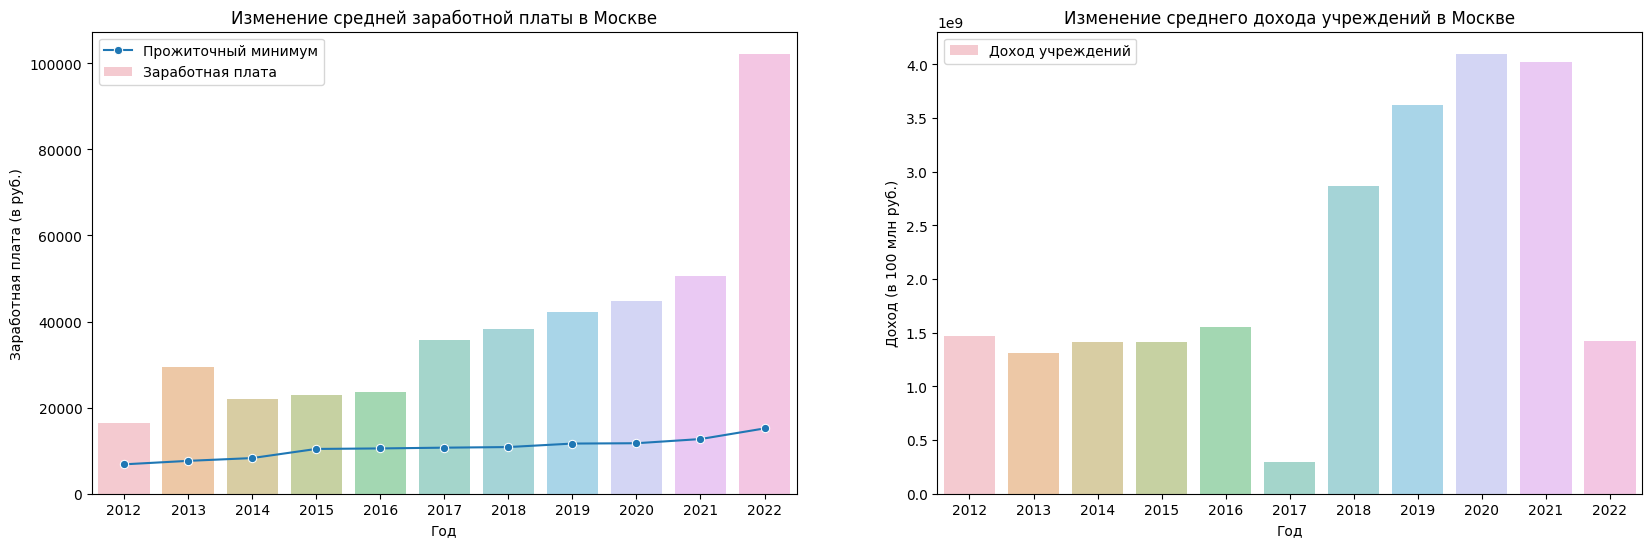

In [238]:
fig, ax = plt.subplots(figsize=(20,6))

plt.subplot(1, 2, 1)
p1 = sns.lineplot(data = msc_df_mean['Прожиточный минимум'], marker='o', label='Прожиточный минимум')
p2 = sns.barplot(data = msc_df_mean, x='Год', y='Заработная плата', alpha=0.5, label='Заработная плата')
plt.legend(loc='upper left')
p1.set_ylabel('Заработная плата (в руб.)')
p2.set_title("Изменение средней заработной платы в Москве")

plt.subplot(1, 2, 2)
p1 = sns.barplot(data = msc_df_mean, x='Год', y='Доход', alpha=0.5, label='Доход учреждений')
p1.set_ylabel('Доход (в 100 млн руб.)')
plt.legend(loc='upper left')
p1.set_title("Изменение среднего дохода учреждений в Москве")

Подведем итог по Москве:


> В изменениях средней заработной платы в Москве с каждым годом (кроме 2013 - 2014) видим положитеьную тендению. А также можно сказать, что уровень жизни для муниципальных работников улучшился.

> В изменениях среднего дохода учреждений также можно увидеть положительную тенденцию до 2022 года. В 2017 году мы имеем не совсем правильные данные, т.к. уровень дохода крайне низкий по сравниию с дргуими годами. Если за 2022 у нас релевантные данные, то можно сказать, что в этом году кол-во сотрудников стало намного меньше, а заработная плата возросла. 

> Наконец, может быть и так, что не все учреждения успели записать данные о своих доходах, что могло и привести к таким аномалиям. 






#### Ханты-Мансийский Автономный округ

<ipython-input-239-03c3a2c597d3>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


Text(0.5, 1.0, 'Изменение среднего дохода учреждений в Ханты-Мансийском Автономном округе')

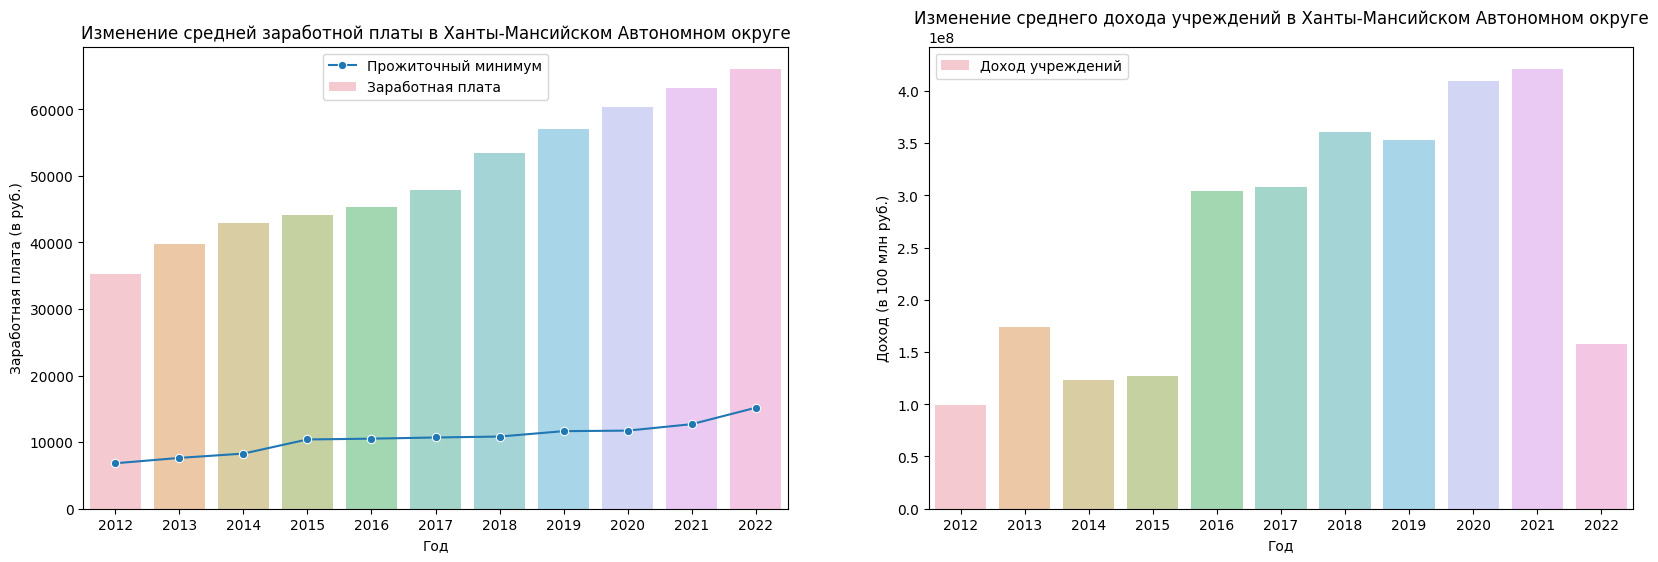

In [239]:
fig, ax = plt.subplots(figsize=(20,6))

plt.subplot(1, 2, 1)
p1 = sns.lineplot(data = hm_df_mean['Прожиточный минимум'], marker='o', label='Прожиточный минимум')
p2 = sns.barplot(data = hm_df_mean, x='Год', y='Заработная плата', alpha=0.5, label='Заработная плата')
plt.legend(loc='upper center')
p1.set_ylabel('Заработная плата (в руб.)')
p2.set_title("Изменение средней заработной платы в Ханты-Мансийском Автономном округе")

plt.subplot(1, 2, 2)
p1 = sns.barplot(data = hm_df_mean, x='Год', y='Доход', alpha=0.5, label='Доход учреждений')
p1.set_ylabel('Доход (в 100 млн руб.)')
plt.legend(loc='upper left')
p1.set_title("Изменение среднего дохода учреждений в Ханты-Мансийском Автономном округе")

Подведем итог по Ханты-Мансийскому Автономному округу:

> С заработной платой все хорошо, так как тенденция роста зарплат из года в год положительная.

> Опираясь на вывод по Москве, мы пришли к заключению, что в 2022 году не все учреждения делились статисткой на сайте, что могло привести к таким значениям среднего дохода. 






#### Московская область

<ipython-input-240-62118375a3ea>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


Text(0.5, 1.0, 'Изменение среднего дохода учреждений в Московской области')

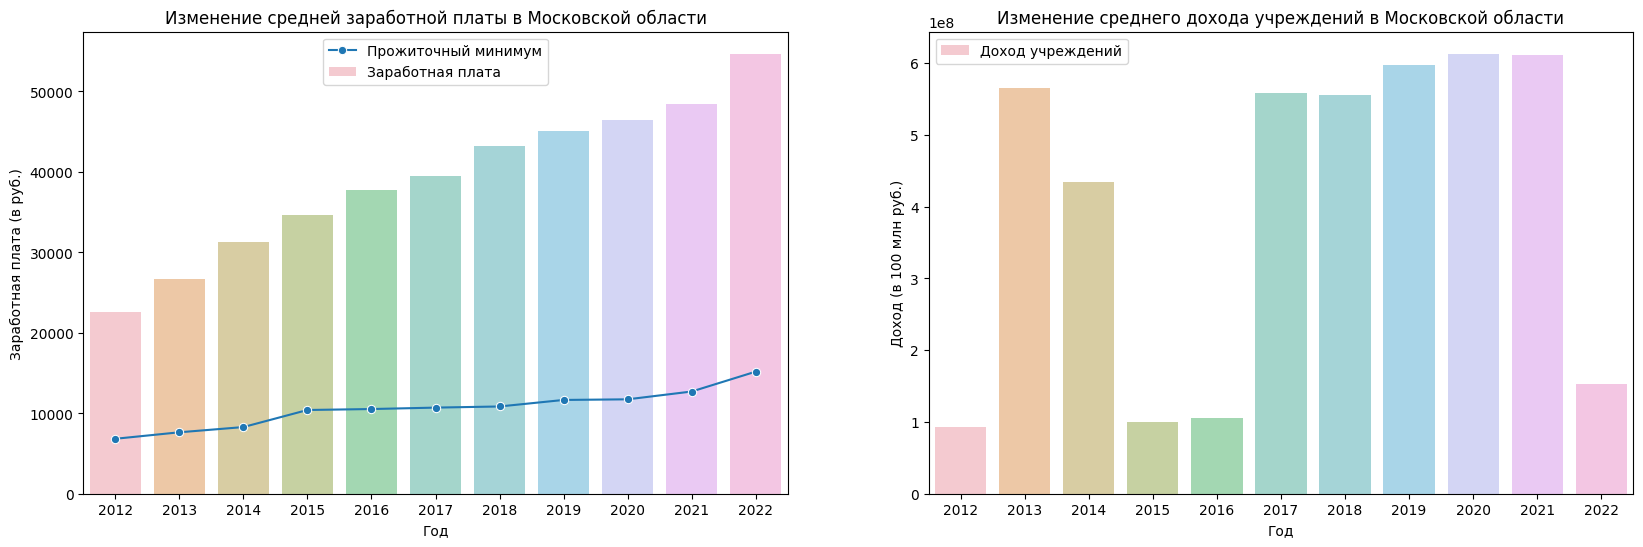

In [240]:
fig, ax = plt.subplots(figsize=(20,6))

plt.subplot(1, 2, 1)
p1 = sns.lineplot(data = msc_obl_df_mean['Прожиточный минимум'], marker='o', label='Прожиточный минимум')
p2 = sns.barplot(data = msc_obl_df_mean, x='Год', y='Заработная плата', alpha=0.5, label='Заработная плата')
plt.legend(loc='upper center')
p1.set_ylabel('Заработная плата (в руб.)')
p2.set_title("Изменение средней заработной платы в Московской области")

plt.subplot(1, 2, 2)
p1 = sns.barplot(data = msc_obl_df_mean, x='Год', y='Доход', alpha=0.5, label='Доход учреждений')
p1.set_ylabel('Доход (в 100 млн руб.)')
plt.legend(loc='upper left')
p1.set_title("Изменение среднего дохода учреждений в Московской области")

Подведем итог по Московской области:


> Со средней заработной платой все в порядке, она увеличивается из года в год, что и должно быть.

> Со средним доходом также делаем вывод, что на нашем ресурсе могла быть неисправность в записи данных дохода в некоторых годах. Но в то же время, глядя на остальные года можно прийти к интересному умозаключению: скорее всего, учитывая политические происшедствия в 2014 году, доход резко стал меньше, но затем все пришло в норму.





#### Санкт-Петербург

<ipython-input-241-28d2030e9777>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


Text(0.5, 1.0, 'Изменение среднего дохода учреждений в Санкт-Петербурге')

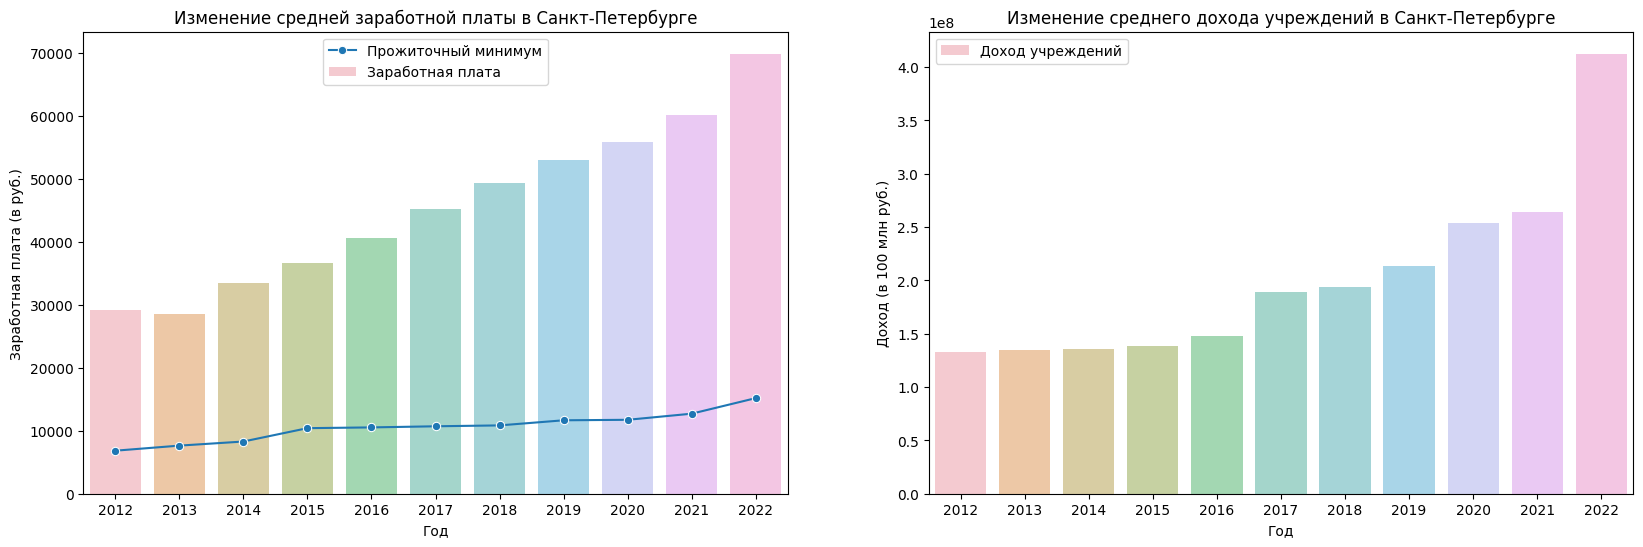

In [241]:
fig, ax = plt.subplots(figsize=(20,6))

plt.subplot(1, 2, 1)
p1 = sns.lineplot(data = spb_df_mean['Прожиточный минимум'], marker='o', label='Прожиточный минимум')
p2 = sns.barplot(data = spb_df_mean, x='Год', y='Заработная плата', alpha=0.5, label='Заработная плата')
plt.legend(loc='upper center')
p2.set_title("Изменение средней заработной платы в Санкт-Петербурге")
p1.set_ylabel('Заработная плата (в руб.)')

plt.subplot(1, 2, 2)
p1 = sns.barplot(data = spb_df_mean, x='Год', y='Доход', alpha=0.5, label='Доход учреждений')
p1.set_ylabel('Доход (в 100 млн руб.)')
plt.legend(loc='upper left')
p1.set_title("Изменение среднего дохода учреждений в Санкт-Петербурге")

Подведем итог по Санкт-Петербургу:


> После всех действий с данными по Санкт-Петербургу можно сделать вывод, что скорее всего данные явлюятся релевантными. Тенденция доходов и заработной платы положительная.



#### Ямало-Ненецкий АО

<ipython-input-242-dc885cc10ee8>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


Text(0.5, 1.0, 'Изменение среднего дохода учреждений в Ямало-Ненецком АО')

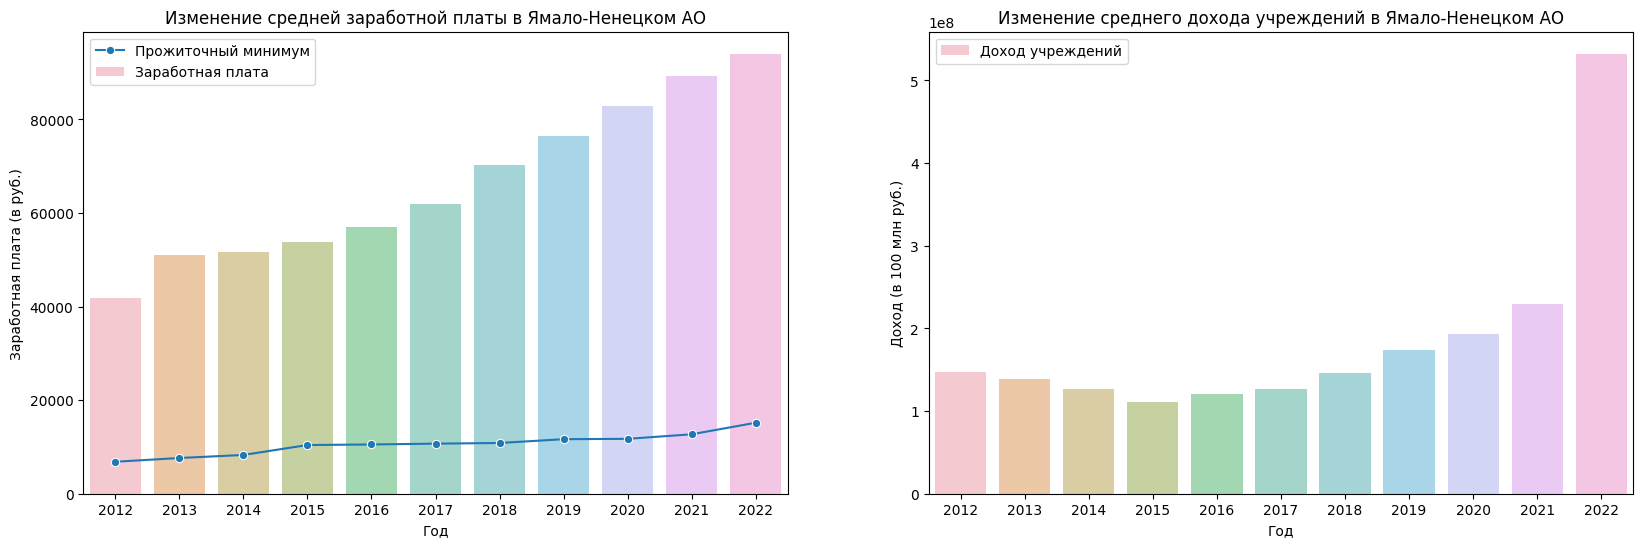

In [242]:
fig, ax = plt.subplots(figsize=(20,6))

plt.subplot(1, 2, 1)
p1 = sns.lineplot(data = yamal_nen_df_mean['Прожиточный минимум'], marker='o', label='Прожиточный минимум')
p2 = sns.barplot(data = yamal_nen_df_mean, x='Год', y='Заработная плата', alpha=0.5, label='Заработная плата')
plt.legend(loc='upper left')
p2.set_title("Изменение средней заработной платы в Ямало-Ненецком АО")
p1.set_ylabel('Заработная плата (в руб.)')

plt.subplot(1, 2, 2)
p1 = sns.barplot(data = yamal_nen_df_mean, x='Год', y='Доход', alpha=0.5, label='Доход учреждений')
p1.set_ylabel('Доход (в 100 млн руб.)')
plt.legend(loc='upper left')
p1.set_title("Изменение среднего дохода учреждений в Ямало-Ненецком АО")

Подведем итог по Ямало-Ненецкому АО:


> Занимательно, что во всех рассмотренных нами регионах, средняя заработная плата имеет только положительную тенденцию, что не может не радовать, т.к. это показывает, что наши данные достаточно релевантны, чем могли бы быть.


> Очень интересный график дохода, думаем тут можно сказать только то, что в 2022 году доход увеличился в почти 2.5 раза по сравнению с предыдущим годом, так как аномалий не было обнаружено.




### **Сравнение доходов и зарплат в разных регионах за 2022 год**

Для этого нам необходимо создать датасет, в котором будет содержаться информция о всех исследуемых нами регионах за 2022 год.

In [243]:
year2022_df = df[(df['year'] == 2022) & ((df['region'] == 'Москва') 
               | (df['region'] == 'Московская обл') 
               | (df['region'] == 'Санкт-Петербург') 
               | (df['region'] == 'Ямало-Ненецкий АО') 
               | (df['region'] == 'Ханты-Мансийский Автономный округ - Югра АО'))]
year2022_df.columns = ['id', 'ИНН', 'Регион', 'Название учреждения', 'Кол-во работников', 'Год', 'Доход', 'Заработная плата']
year2022_df = year2022_df.groupby('Регион').mean()[['Кол-во работников', 'Доход', 'Заработная плата']].apply(lambda x: x.round()).reset_index()
year2022_df.insert(loc=4, column='Прожиточный минимум', value=min_life[-1])
year2022_df

<ipython-input-243-7bdaa0897fcf>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  year2022_df = year2022_df.groupby('Регион').mean()[['Кол-во работников', 'Доход', 'Заработная плата']].apply(lambda x: x.round()).reset_index()


,Регион,Кол-во работников,Доход,Заработная плата,Прожиточный минимум
0,Москва,737.0,1.422916e+09,102232.0,15172
1,Московская обл,200.0,1.528839e+08,54678.0,15172
2,Санкт-Петербург,318.0,4.123656e+08,69824.0,15172
3,Ханты-Мансийский Автономный округ - Югра АО,126.0,1.577608e+08,66096.0,15172
4,Ямало-Ненецкий АО,96.0,5.319827e+08,94024.0,15172


Text(0, 0.5, 'Заработная плата (в руб.)')

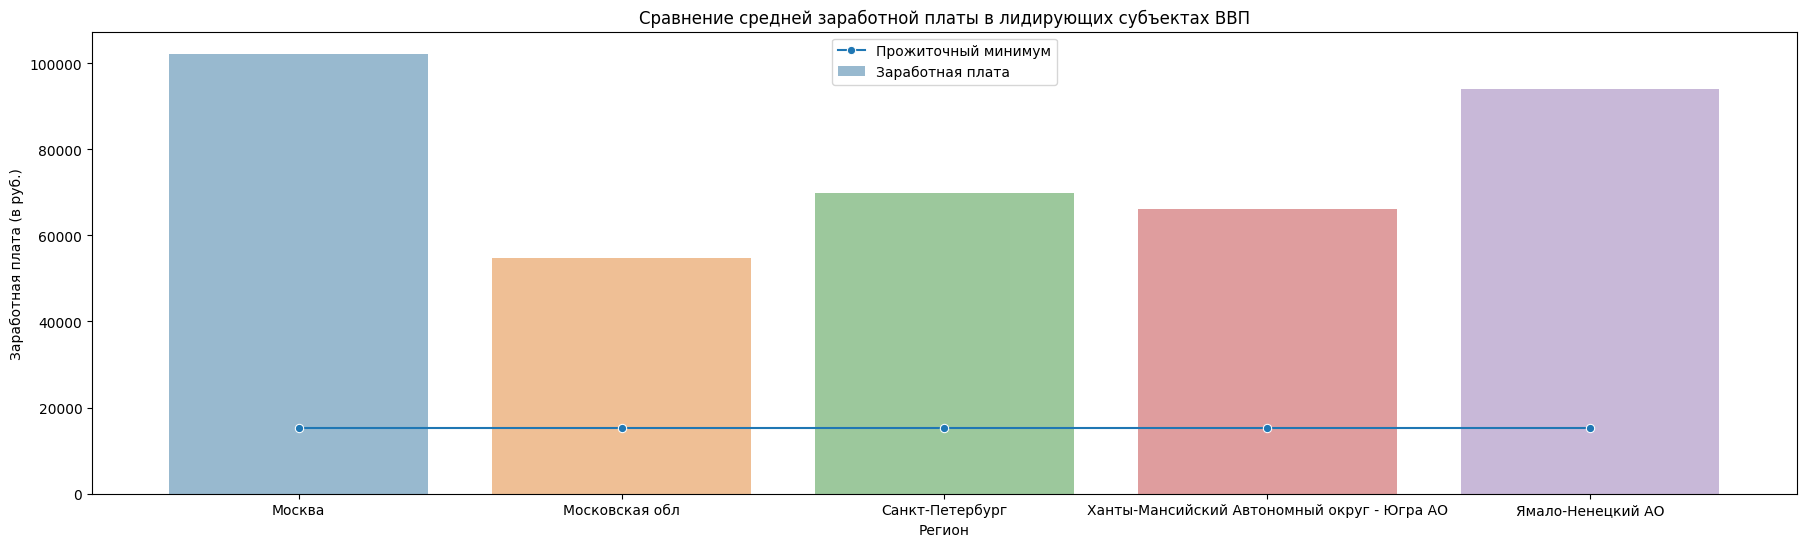

In [244]:
fig, ax = plt.subplots(figsize=(22,6))

p = sns.barplot(data = year2022_df, x='Регион', y='Заработная плата', alpha=0.5, label='Заработная плата')
p1 = sns.lineplot(data = year2022_df['Прожиточный минимум'], marker='o', label='Прожиточный минимум')
plt.legend(loc='upper center')
p.set_title("Сравнение средней заработной платы в лидирующих субъектах ВВП")
p.set_ylabel('Заработная плата (в руб.)')

Подведем итог после просмотра данного графика:


> Разумно было ожидать, что Москва стоит на 1 месте по заработной плате в лидирующих субъектах РФ.


> Также было интересно выявить, что Ямало-Ненецкий Автономный округ имеет среднюю заработную плату муниципальных служащих больше, чем в Санкт-Петербурге, Московской обл. и Ханты-Манйсийске.





### **Зависимость зарплат от количества работников**

In [245]:
work2022_df = df[(df['year'] == 2022) & ((df['region'] == 'Москва') 
               | (df['region'] == 'Московская обл') 
               | (df['region'] == 'Санкт-Петербург') 
               | (df['region'] == 'Ямало-Ненецкий АО') 
               | (df['region'] == 'Ханты-Мансийский Автономный округ - Югра АО'))]
work2022_df.columns = ['id', 'ИНН', 'Регион', 'Название учреждения', 'Кол-во работников', 'Год', 'Доход', 'Заработная плата']
work2022_df

,id,ИНН,Регион,Название учреждения,Кол-во работников,Год,Доход,Заработная плата
581,242055,7727763150,Москва,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ГОРОДА МО...,1929,2022,5.954183e+09,63768.80
1802,246142,7713307157,Москва,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХР...,70,2022,6.268318e+07,87062.30
60907,242062,8618001442,Ханты-Мансийский Автономный округ - Югра АО,МУНИЦИПАЛЬНОЕ АВТОНОМНОЕ УЧРЕЖДЕНИЕ ДОПОЛНИТЕЛ...,65,2022,1.032506e+08,62426.81
81954,60280,8613005235,Ханты-Мансийский Автономный округ - Югра АО,"МУНИЦИПАЛЬНОЕ АВТОНОМНОЕ УЧРЕЖДЕНИЕ ""БЕРЕЗОВСК...",22,2022,2.416336e+07,59643.92
82894,246215,5007042626,Московская обл,ГОСУДАРСТВЕННОЕ АВТОНОМНОЕ УЧРЕЖДЕНИЕ СОЦИАЛЬН...,121,2022,1.305144e+08,50544.63
...,...,...,...,...,...,...,...,...
1372839,22745,8613005228,Ханты-Мансийский Автономный округ - Югра АО,"МУНИЦИПАЛЬНОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ""БЕРЕЗОВСКА...",25,2022,2.530441e+07,52513.99
1373125,45525,5028020341,Московская обл,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ СОЦИАЛЬНО...,143,2022,7.085217e+07,45458.74
1373796,222558,8601010008,Ханты-Мансийский Автономный округ - Югра АО,МУНИЦИПАЛЬНОЕ БЮДЖЕТНОЕ ДОШКОЛЬНОЕ ОБРАЗОВАТЕЛ...,229,2022,2.337667e+09,62002.49
1374412,188591,7802071739,Санкт-Петербург,САНКТ-ПЕТЕРБУРГСКОЕ ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ ...,844,2022,8.773439e+08,84467.00


<ipython-input-246-3a045eba682b>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


Text(0.5, 1.0, 'Увеличенный масштаб')

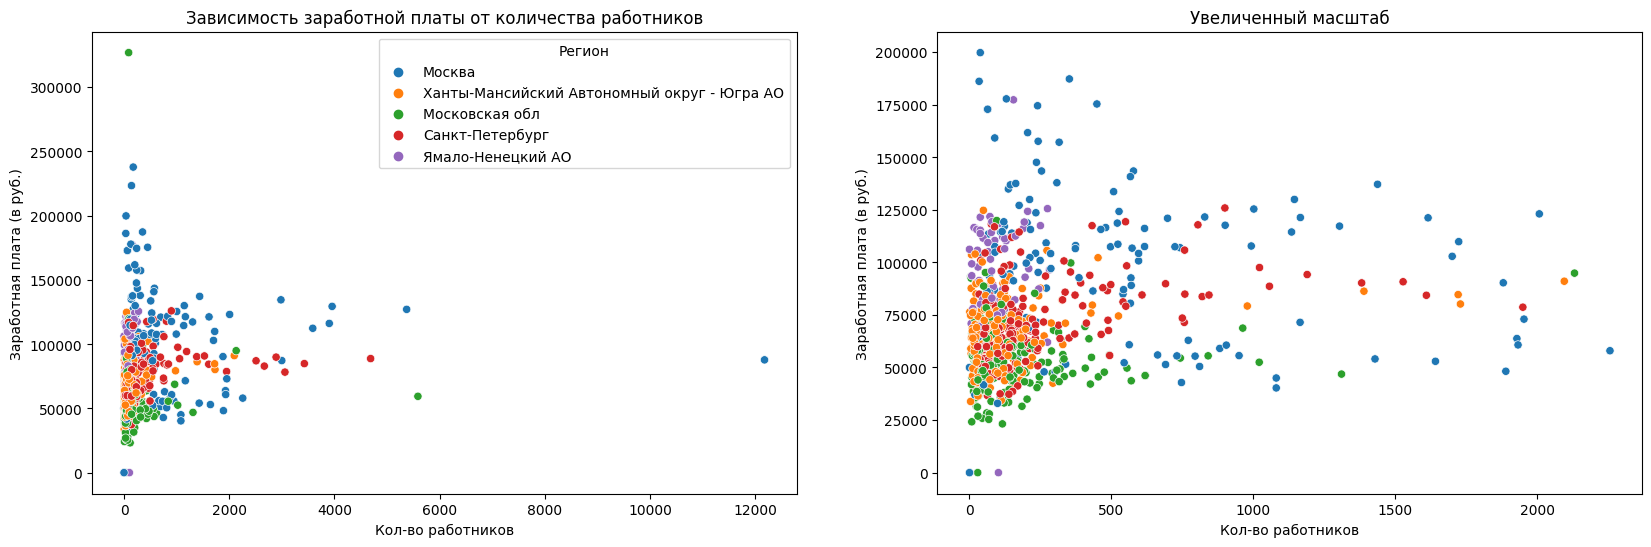

In [246]:
fig, ax = plt.subplots(figsize=(20,6))
plt.subplot(1, 2, 1)
p1 = sns.scatterplot(data=work2022_df, x="Кол-во работников", y="Заработная плата", hue="Регион")
p1.set_ylabel('Заработная плата (в руб.)')
p1.set_title("Зависимость заработной платы от количества работников")

plt.subplot(1, 2, 2)
subset = work2022_df[(work2022_df['Кол-во работников'] < 2500 ) & (work2022_df['Заработная плата'] < 200000)]
p2 = sns.scatterplot(data=subset, x='Кол-во работников', y='Заработная плата', hue="Регион", legend =False)
p2.set_ylabel('Заработная плата (в руб.)')
p2.set_title("Увеличенный масштаб")

Промежуточный итог:


> Спокойно заявляем, что Москва лидер по заработной плате и доходам, т.к. синие точки находятся в преобладающем большинстве на достаточно высоких суммах.


> В Московской области учреждение, где средняя заработная плата больше 300000 руб. Не совсем ясно, является ли данная запись выбросом, поэтому мы её оставим.


> Также по нулевым значениям в графиках увидим то, что наши данные все-таки имеют неточности.







### **Зависимость дохода от количества работников**

<ipython-input-247-4c4e8fd1557b>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


Text(0.5, 1.0, 'Увеличенный масштаб')

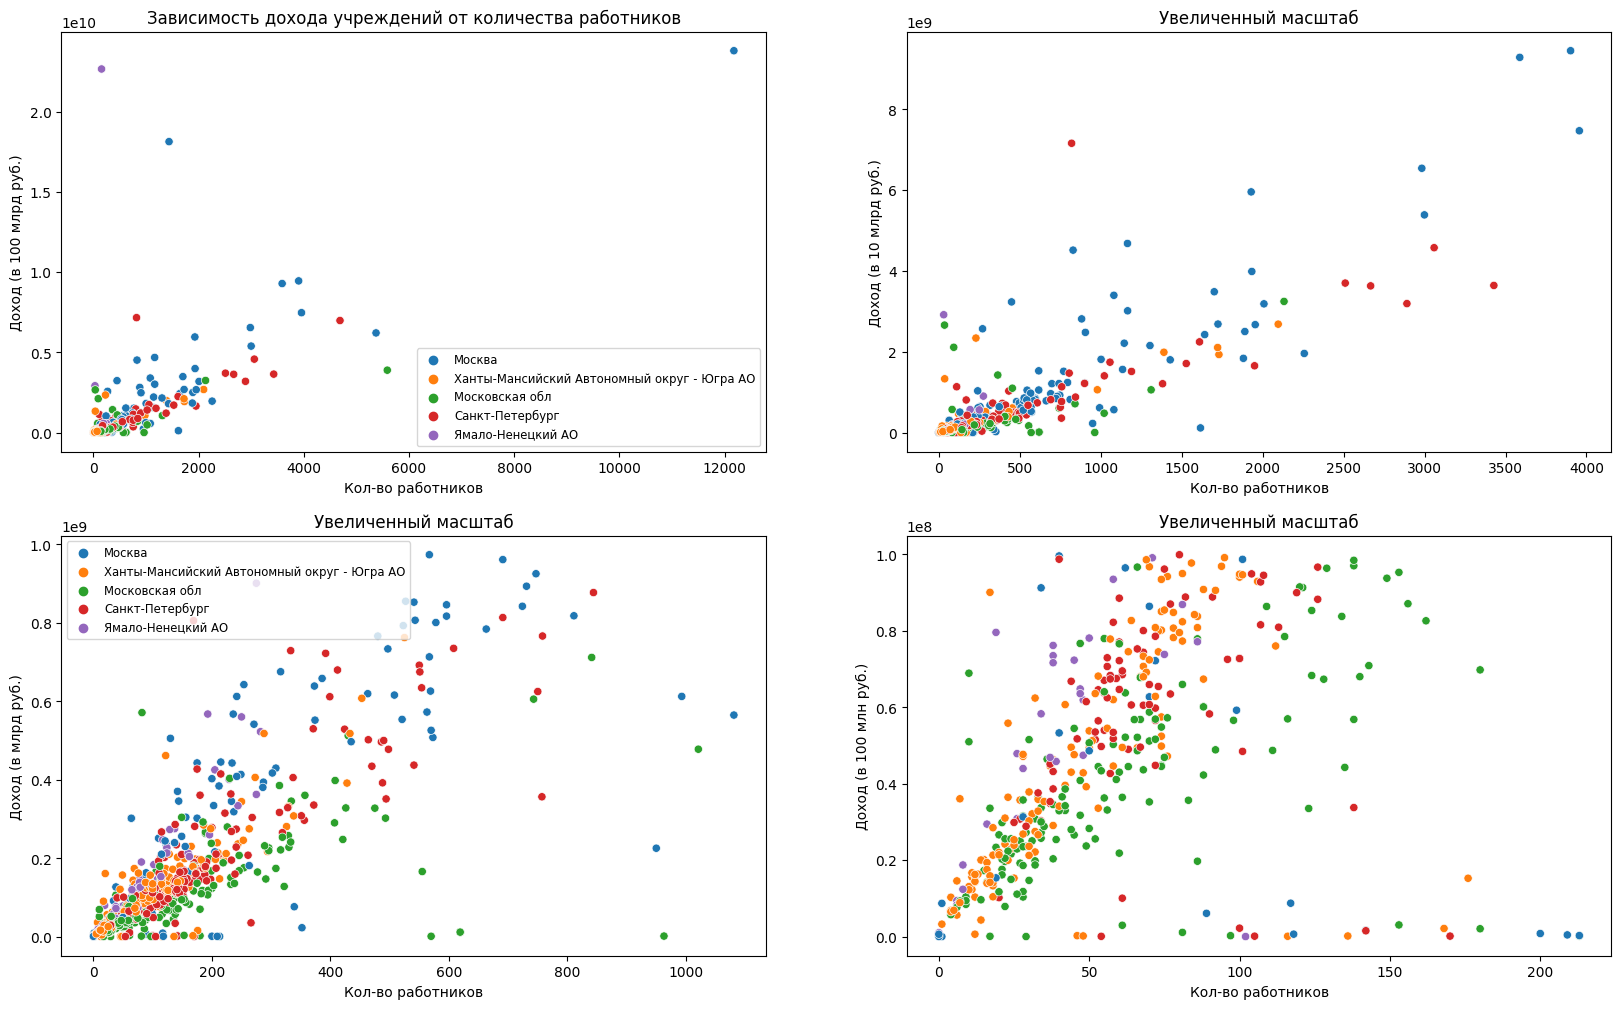

In [247]:
fig, ax = plt.subplots(figsize=(20,12))
plt.subplot(2, 2, 1)
p1 = sns.scatterplot(data=work2022_df, x="Кол-во работников", y="Доход", hue="Регион")
p1.set_ylabel('Доход (в 100 млрд руб.)')
p1.set_title("Зависимость дохода учреждений от количества работников")
plt.legend(fontsize="small")

plt.subplot(2, 2, 2)
subset = work2022_df[(work2022_df['Кол-во работников'] < 4000 ) & (work2022_df['Доход'] < 10000000000)]
p2 = sns.scatterplot(data=subset, x='Кол-во работников', y='Доход', hue="Регион", legend=False)
p2.set_ylabel('Доход (в 10 млрд руб.)')
p2.set_title("Увеличенный масштаб")


plt.subplot(2, 2, 3)
subset = work2022_df[(work2022_df['Кол-во работников'] < 1500 ) & (work2022_df['Доход'] < 1000000000)]
p2 = sns.scatterplot(data=subset, x='Кол-во работников', y='Доход', hue="Регион")
p2.set_ylabel('Доход (в млрд руб.)')
p2.set_title("Увеличенный масштаб")
plt.legend(fontsize="small")

plt.subplot(2, 2, 4)
subset = work2022_df[(work2022_df['Кол-во работников'] < 250 ) & (work2022_df['Доход'] < 100000000)]
p2 = sns.scatterplot(data=subset, x='Кол-во работников', y='Доход', hue="Регион", legend=False)
p2.set_ylabel('Доход (в 100 млн руб.)')
p2.set_title("Увеличенный масштаб")

Промежуточный итог:


> Без выбросов не обошлось, но их не так много. 

> Большинство учреджений находятся в одной области, но Москва и Санкт-Петербург всё равно выделяются на фоне остальных.





### **Сравнение Санкт-Петербурга с нашими родными областями**

Давид из Архангельска, а Илья из Иркутска. Поступили в ИТМО и переехали в Санкт-Петербург. Поэтому появился интерес сравнить, насколько сильно различаются муниципальные учреждения в этих субъектах в 2022 году. 

In [248]:
compare_regions_mean = df[(df['year'] == 2022) & ((df['region'] =='Санкт-Петербург') 
                  | (df['region'] == 'Архангельская обл') 
                  | (df['region'] == 'Иркутская обл'))]
compare_regions_mean.columns = ['id', 'ИНН', 'Регион', 'Название учреждения', 'Кол-во работников', 'Год', 'Доход', 'Заработная плата']
compare_regions_mean = compare_regions_mean.groupby('Регион').mean()[['Кол-во работников', 'Доход', 'Заработная плата']].apply(lambda x: x.round()).reset_index()
compare_regions_mean.insert(loc=4, column='Прожиточный минимум', value=min_life[-1])
compare_regions_mean

<ipython-input-248-144ffeabc98c>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  compare_regions_mean = compare_regions_mean.groupby('Регион').mean()[['Кол-во работников', 'Доход', 'Заработная плата']].apply(lambda x: x.round()).reset_index()


,Регион,Кол-во работников,Доход,Заработная плата,Прожиточный минимум
0,Архангельская обл,92.0,155161902.0,46187.0,15172
1,Иркутская обл,101.0,69014962.0,43320.0,15172
2,Санкт-Петербург,318.0,412365648.0,69824.0,15172


#### Сравнение доходов и зарплат

Text(0, 0.5, 'Заработная плата (в руб.)')

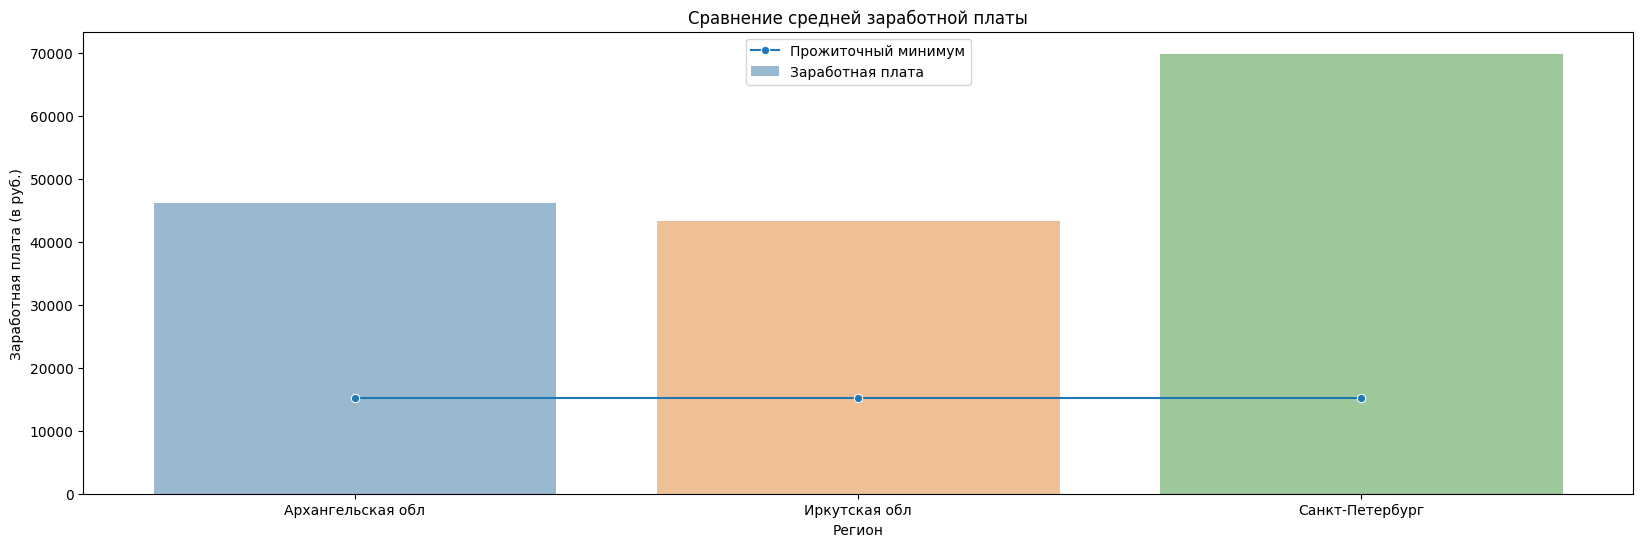

In [249]:
fig, ax = plt.subplots(figsize=(20,6))

p = sns.barplot(data = compare_regions_mean, x='Регион', y='Заработная плата', alpha=0.5, label='Заработная плата')
p1 = sns.lineplot(data = compare_regions_mean['Прожиточный минимум'], marker='o', label='Прожиточный минимум')
plt.legend(loc='upper center')
p.set_title("Сравнение средней заработной платы")
p.set_ylabel('Заработная плата (в руб.)')

Промежуточный итог:


> Весьма неожиданный результат, так как численность населения Иркусткой области превышает численность Архангельской почти в 2 раза, но при этом заработная плата очень схожа. 

> В Санкт-Петербурге, как и ожидалось, значение сильно больше.

#### Зависиомть зарплат от количества работников

In [250]:
compare_regions = df[(df['year'] == 2022) & ((df['region'] =='Санкт-Петербург') 
                  | (df['region'] == 'Архангельская обл') 
                  | (df['region'] == 'Иркутская обл'))]
compare_regions.columns = ['id', 'ИНН', 'Регион', 'Название учреждения', 'Кол-во работников', 'Год', 'Доход', 'Заработная плата']
compare_regions

,id,ИНН,Регион,Название учреждения,Кол-во работников,Год,Доход,Заработная плата
1363,203957,3809015944,Иркутская обл,ОБЛАСТНОЕ ГОСУДАРСТВЕННОЕ АВТОНОМНОЕ УЧРЕЖДЕНИ...,1734,2022,1.285197e+09,60170.00
1537,33761,3841006609,Иркутская обл,"МУНИЦИПАЛЬНОЕ КАЗЕННОЕ УЧРЕЖДЕНИЕ КУЛЬТУРЫ ""МЕ...",6,2022,6.716054e+06,59980.50
57642,28628,3803101280,Иркутская обл,ОБЛАСТНОЕ ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ...,252,2022,2.140159e+08,45666.21
60667,240934,3817021701,Иркутская обл,МУНИЦИПАЛЬНОЕ БЮДЖЕТНОЕ ДОШКОЛЬНОЕ ОБРАЗОВАТЕЛ...,67,2022,4.763300e+07,42200.00
60678,240935,3817001198,Иркутская обл,МУНИЦИПАЛЬНОЕ БЮДЖЕТНОЕ ОБЩЕОБРАЗОВАТЕЛЬНОЕ УЧ...,134,2022,1.406032e+08,65404.00
...,...,...,...,...,...,...,...,...
1371325,57692,3815006112,Иркутская обл,МУНИЦИПАЛЬНОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ДОПОЛНИТЕЛЬ...,85,2022,4.250624e+07,34523.43
1371437,3212,3849014337,Иркутская обл,"МУНИЦИПАЛЬНОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ КУЛЬТУРЫ ""Х...",8,2022,5.894760e+06,41635.00
1371592,238115,7820003499,Санкт-Петербург,ФЕДЕРАЛЬНОЕ ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ НАУЧНОЕ ...,175,2022,4.271288e+08,114417.00
1372680,150174,7805149479,Санкт-Петербург,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ ОБЩЕОБРАЗОВАТЕЛЬНОЕ ...,141,2022,1.195842e+08,59551.17


<ipython-input-251-5f43ac766fd9>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


Text(0.5, 1.0, 'Увеличенный масштаб')

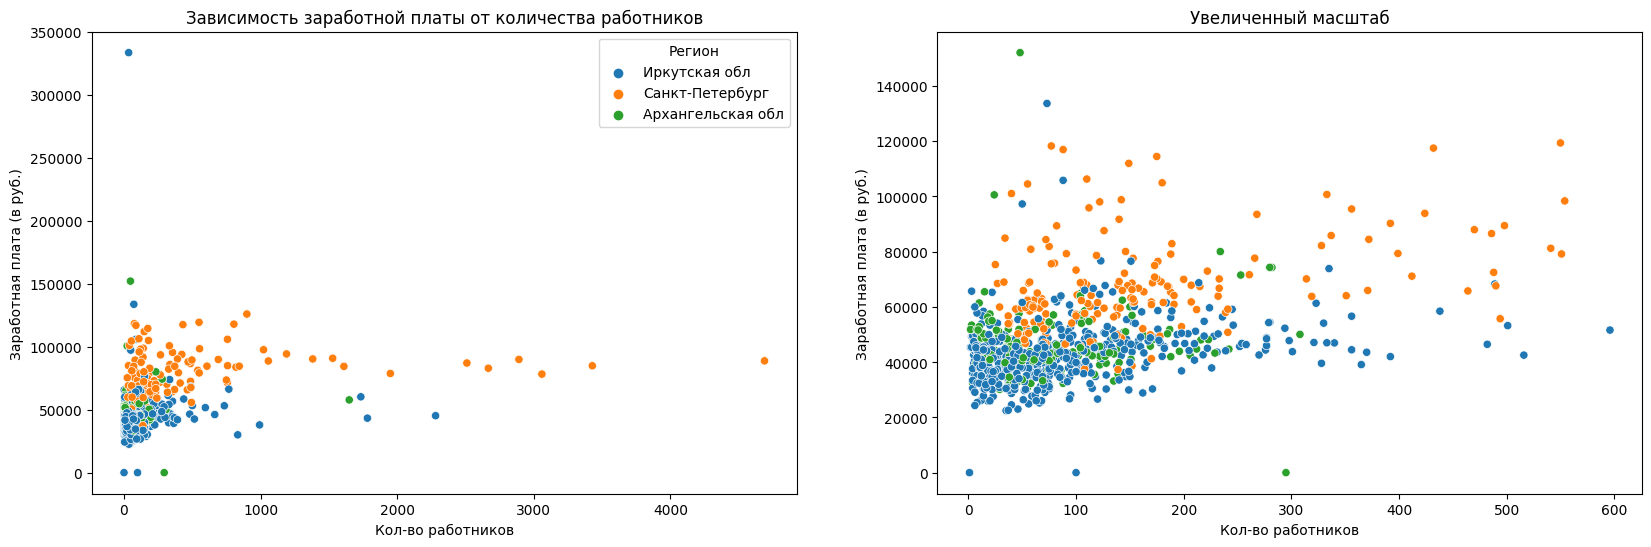

In [251]:
fig, ax = plt.subplots(figsize=(20,6))
plt.subplot(1, 2, 1)
p1 = sns.scatterplot(data=compare_regions, x="Кол-во работников", y="Заработная плата", hue="Регион")
p1.set_ylabel('Заработная плата (в руб.)')
p1.set_title("Зависимость заработной платы от количества работников")

plt.subplot(1, 2, 2)
subset = compare_regions[(compare_regions['Кол-во работников'] < 600 ) & (compare_regions['Заработная плата'] < 200000)]
p2 = sns.scatterplot(data=subset, x='Кол-во работников', y='Заработная плата', hue="Регион", legend =False)
p2.set_ylabel('Заработная плата (в руб.)')
p2.set_title("Увеличенный масштаб")

Промежуточный итог:


> На графике с увеличенным масштабом чётко видно, что Архангельск и Иркутск идут вровень.

> Санкт-Петербург сильно выделяется на фоне других субъектов.

#### Зависимость дохода от количества работников

<ipython-input-252-4e359e7d3a53>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


Text(0.5, 1.0, 'Увеличенный масштаб')

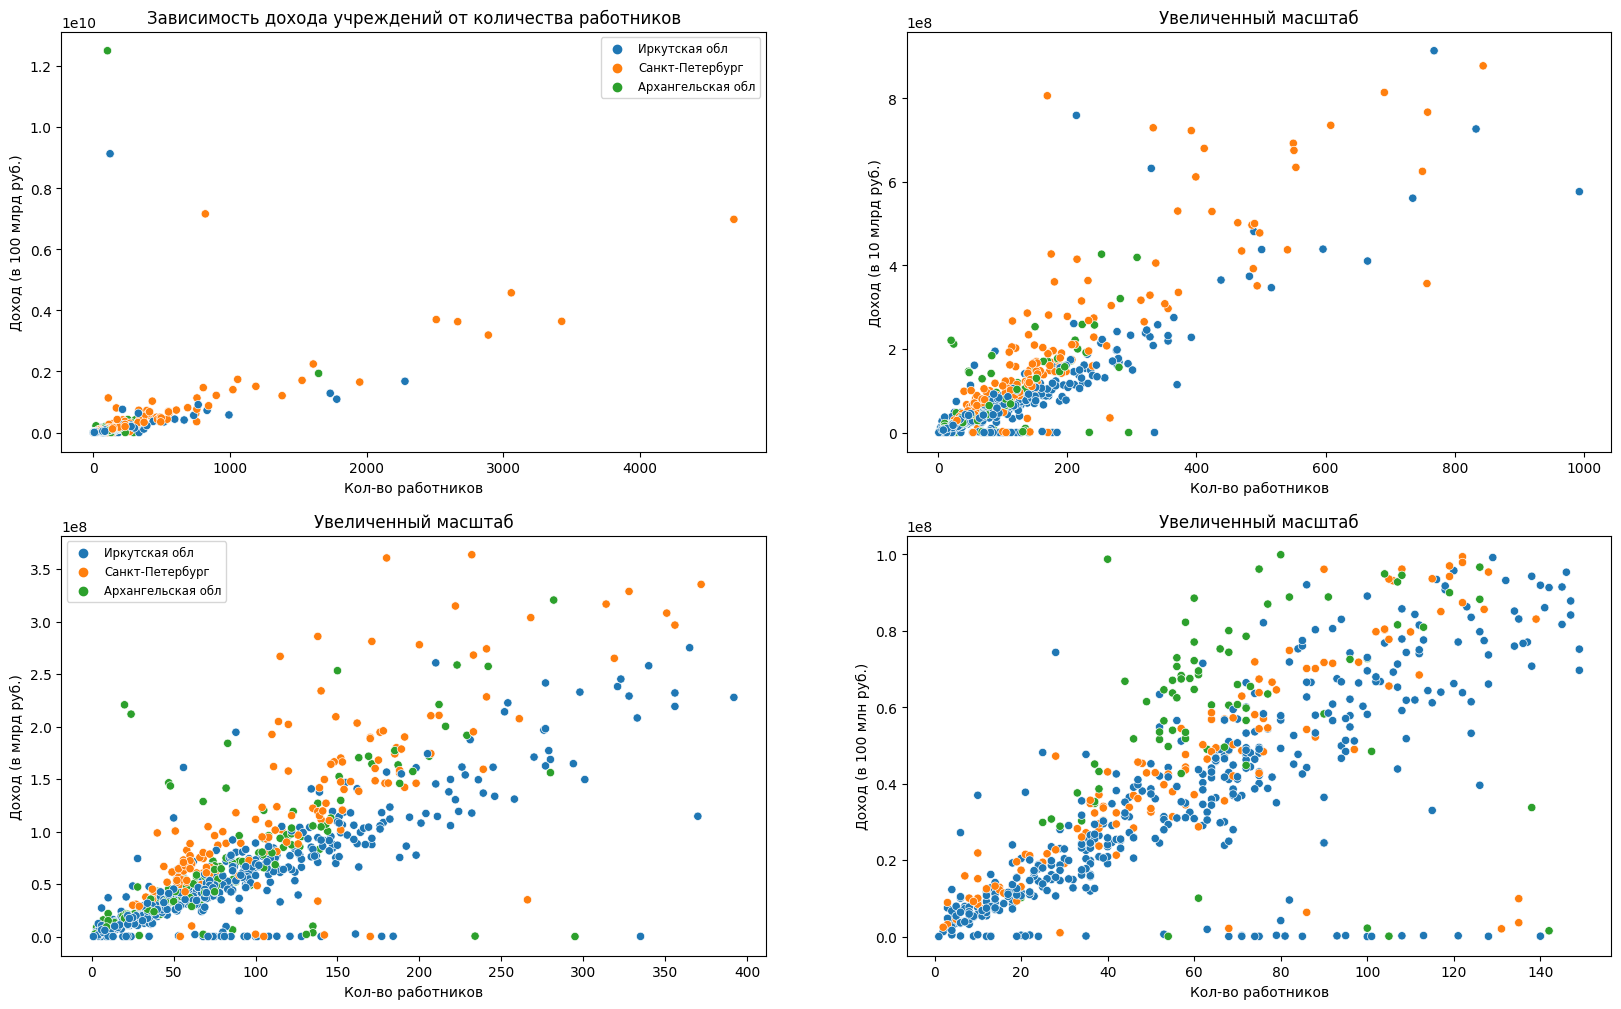

In [252]:
fig, ax = plt.subplots(figsize=(20,12))
plt.subplot(2, 2, 1)
p1 = sns.scatterplot(data=compare_regions, x="Кол-во работников", y="Доход", hue="Регион")
p1.set_ylabel('Доход (в 100 млрд руб.)')
p1.set_title("Зависимость дохода учреждений от количества работников")
plt.legend(fontsize="small")

plt.subplot(2, 2, 2)
subset = compare_regions[(compare_regions['Кол-во работников'] < 4000 ) & (compare_regions['Доход'] < 1000000000)]
p2 = sns.scatterplot(data=subset, x='Кол-во работников', y='Доход', hue="Регион", legend=False)
p2.set_ylabel('Доход (в 10 млрд руб.)')
p2.set_title("Увеличенный масштаб")

plt.subplot(2, 2, 3)
subset = compare_regions[(compare_regions['Кол-во работников'] < 400 ) & (compare_regions['Доход'] < 400000000)]
p2 = sns.scatterplot(data=subset, x='Кол-во работников', y='Доход', hue="Регион")
p2.set_ylabel('Доход (в млрд руб.)')
p2.set_title("Увеличенный масштаб")
plt.legend(fontsize="small")

plt.subplot(2, 2, 4)
subset = compare_regions[(compare_regions['Кол-во работников'] < 150 ) & (compare_regions['Доход'] < 100000000)]
p2 = sns.scatterplot(data=subset, x='Кол-во работников', y='Доход', hue="Регион", legend=False)
p2.set_ylabel('Доход (в 100 млн руб.)')
p2.set_title("Увеличенный масштаб")

Промежуточный итог:


> Выбросов весьма большое количество, так как датасеты по Архангельской и  и Иркутской областям не проходили чёткой обработки, но тем не менее, этот факт не сильно портит картину.  

> Видно, что при меньшей численности работников в Архангельской области доход учреждений больше, чем в Иркутске.  

## **Вывод**

Нами был выполнен разведочный анализ муниципальных учреждений нашей страны по данным, которые мы собрали и подготовили самостоятельно. Результаты анализа весьма понятны, но некоторые вещи стоит упомянуть:

*   Мы сделали анализ только по нескольким субъектам из немалого числа, но работы по отчистке данных из уже подготовленного датасета оказалось больше, чем ожидалось. Поэтому для точного анализа остальных субъектов придётся проводить дополнительную обработку.
*   Для некоторого числа записей нельзя с уверенностью сказать являются ли они аномальными или нет. Данную проблему можно списать на неопытность в сфере 
анализа экономических данных.
*   В ходе выполнения данного проекта каждый из участников изучил для себя новые навыки, которые могут пригодиться в дальнейшей работе. 

